In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

In [98]:
# 그래프 한글, 마이너스 깨짐 방지

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
plt.rcParams['axes.unicode_minus'] = False
rc('font', family=font_name)

## 원유 가격 데이터 전처리

In [47]:
# 2012~2021년 각 월별 원유 데이터
oil_day = pd.read_csv('./data/국제_원유가격20120101_20211231.csv', encoding='utf-8')
oil_day

,기간,Dubai,Brent,WTI
0,12년01월03일,105.91,112.13,102.96
1,12년01월04일,108.49,113.70,103.22
2,12년01월05일,110.23,112.74,101.81
3,12년01월06일,109.92,113.06,101.56
4,12년01월09일,110.50,112.45,101.31
...,...,...,...,...
2576,21년12월27일,NaN,78.60,75.57
2577,21년12월28일,76.47,78.94,75.98
2578,21년12월29일,76.91,79.23,76.56
2579,21년12월30일,77.24,79.32,76.99


In [48]:
oil_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2581 entries, 0 to 2580
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기간      2581 non-null   object 
 1   Dubai   2503 non-null   float64
 2   Brent   2573 non-null   float64
 3   WTI     2514 non-null   float64
dtypes: float64(3), object(1)
memory usage: 80.8+ KB


In [49]:
oil_day.rename(columns={'기간':'date'}, inplace=True)
oil_day

,date,Dubai,Brent,WTI
0,12년01월03일,105.91,112.13,102.96
1,12년01월04일,108.49,113.70,103.22
2,12년01월05일,110.23,112.74,101.81
3,12년01월06일,109.92,113.06,101.56
4,12년01월09일,110.50,112.45,101.31
...,...,...,...,...
2576,21년12월27일,NaN,78.60,75.57
2577,21년12월28일,76.47,78.94,75.98
2578,21년12월29일,76.91,79.23,76.56
2579,21년12월30일,77.24,79.32,76.99


In [50]:
# 원유가격 데이터 결측치 확인
oil_day.isnull().sum()

date      0
Dubai    78
Brent     8
WTI      67
dtype: int64

In [51]:
# 결측치 발생한 지점을 위아래 값의 평균으로 대체
# interpolate함수 : 결측치를 앞뒤값의 평균으로 처리해주는 함수. 시계열데이터 결측치처리에 효과적.
oil_day.interpolate(inplace=True)
oil_day.isnull().sum()

date     0
Dubai    0
Brent    0
WTI      0
dtype: int64

In [52]:
oil_day['date'] = oil_day['date'].str.replace('년','-')
oil_day['date'] = oil_day['date'].str.replace('월','-')
oil_day['date'] = oil_day['date'].str.replace('일','')
oil_day

,date,Dubai,Brent,WTI
0,12-01-03,105.91,112.13,102.96
1,12-01-04,108.49,113.70,103.22
2,12-01-05,110.23,112.74,101.81
3,12-01-06,109.92,113.06,101.56
4,12-01-09,110.50,112.45,101.31
...,...,...,...,...
2576,21-12-27,75.42,78.60,75.57
2577,21-12-28,76.47,78.94,75.98
2578,21-12-29,76.91,79.23,76.56
2579,21-12-30,77.24,79.32,76.99


In [53]:
oil_day['date'] = '20' + oil_day['date'].astype(str)
oil_day

,date,Dubai,Brent,WTI
0,2012-01-03,105.91,112.13,102.96
1,2012-01-04,108.49,113.70,103.22
2,2012-01-05,110.23,112.74,101.81
3,2012-01-06,109.92,113.06,101.56
4,2012-01-09,110.50,112.45,101.31
...,...,...,...,...
2576,2021-12-27,75.42,78.60,75.57
2577,2021-12-28,76.47,78.94,75.98
2578,2021-12-29,76.91,79.23,76.56
2579,2021-12-30,77.24,79.32,76.99


In [54]:
# type을 str에서 datetime으로 바꿈
oil_day['date'] = pd.to_datetime(oil_day['date'])

In [55]:
oil_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2581 entries, 0 to 2580
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2581 non-null   datetime64[ns]
 1   Dubai   2581 non-null   float64       
 2   Brent   2581 non-null   float64       
 3   WTI     2581 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 80.8 KB


In [56]:
oil_day['oil_avg']=( oil_day['Dubai']+oil_day['Brent']+oil_day['WTI'] ) /3
oil_day

,date,Dubai,Brent,WTI,oil_avg
0,2012-01-03,105.91,112.13,102.96,107.000000
1,2012-01-04,108.49,113.70,103.22,108.470000
2,2012-01-05,110.23,112.74,101.81,108.260000
3,2012-01-06,109.92,113.06,101.56,108.180000
4,2012-01-09,110.50,112.45,101.31,108.086667
...,...,...,...,...,...
2576,2021-12-27,75.42,78.60,75.57,76.530000
2577,2021-12-28,76.47,78.94,75.98,77.130000
2578,2021-12-29,76.91,79.23,76.56,77.566667
2579,2021-12-30,77.24,79.32,76.99,77.850000


In [12]:
# 일별 원유 가격 데이터 파일 저장
oil_day.to_csv('./pre_data/일별_원유가격.csv',encoding='utf-8')

In [57]:
# 월별 원유 가격 데이터 만들기
oil_month = oil_day.resample('M',on='date').mean()
oil_month

,Dubai,Brent,WTI,oil_avg
date,,,,
2012-01-31,109.456667,111.452381,100.289286,107.066111
2012-02-29,116.180952,119.060000,102.370952,112.537302
2012-03-31,122.487273,124.544545,106.205000,117.745606
2012-04-30,117.338500,120.486500,103.346000,113.723667
2012-05-31,107.719348,110.288696,94.546087,104.184710
...,...,...,...,...
2021-08-31,69.518864,70.513636,67.711364,69.247955
2021-09-30,72.628182,74.876364,71.420909,72.975152
2021-10-31,81.610952,83.746190,81.222857,82.193333


In [58]:
oil_month = oil_month.reset_index()
oil_month

,date,Dubai,Brent,WTI,oil_avg
0,2012-01-31,109.456667,111.452381,100.289286,107.066111
1,2012-02-29,116.180952,119.060000,102.370952,112.537302
2,2012-03-31,122.487273,124.544545,106.205000,117.745606
3,2012-04-30,117.338500,120.486500,103.346000,113.723667
4,2012-05-31,107.719348,110.288696,94.546087,104.184710
...,...,...,...,...,...
115,2021-08-31,69.518864,70.513636,67.711364,69.247955
116,2021-09-30,72.628182,74.876364,71.420909,72.975152
117,2021-10-31,81.610952,83.746190,81.222857,82.193333
118,2021-11-30,80.317500,80.849545,78.409091,79.858712


In [59]:
oil_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     120 non-null    datetime64[ns]
 1   Dubai    120 non-null    float64       
 2   Brent    120 non-null    float64       
 3   WTI      120 non-null    float64       
 4   oil_avg  120 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 4.8 KB


In [16]:
# 월별 원유 가격 데이터 파일 저장
oil_month.to_csv('./pre_data/월별_원유가격.csv',encoding='utf-8')

## 종계입식 현황 데이터 전처리 (단위: 천)

In [18]:
breeding =pd.read_csv('./data/2012_2021종계입식현황.csv', encoding='utf-8')
breeding

,date,count
0,2012-01-31,356
1,2012-02-29,672
2,2012-03-31,870
3,2012-04-30,718
4,2012-05-31,496
...,...,...
115,2021-08-31,670
116,2021-09-30,479
117,2021-10-31,591
118,2021-11-30,652


In [19]:
breeding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    120 non-null    object
 1   count   120 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.0+ KB


In [20]:
# type을 str에서 datetime으로 바꿈
breeding['date'] = pd.to_datetime(breeding['date'])

In [21]:
breeding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    120 non-null    datetime64[ns]
 1   count   120 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.0 KB


In [22]:
# 월별 종계입식 데이터 파일 저장
breeding.to_csv('./pre_data/월별_종계입식현황.csv',encoding='utf-8')

## 닭고기가격, 수입량 그래프 시각화

In [228]:
price_df = pd.read_csv('./pre_data/월별_닭고기가격.csv', header=0, encoding='utf8')
price_df

,Unnamed: 0,date,price
0,0,2012-01-31,3202
1,1,2012-02-29,3668
2,2,2012-03-31,4169
3,3,2012-04-30,3399
4,4,2012-05-31,3255
...,...,...,...
115,115,2021-08-31,3505
116,116,2021-09-30,3074
117,117,2021-10-31,3913
118,118,2021-11-30,2985


In [230]:
income_df = pd.read_csv('./pre_data/닭고기수입량(2012_2022).csv', encoding='utf8')
income_df

,date,import amount
0,2012-01-31,8754
1,2012-02-29,10098
2,2012-03-31,10836
3,2012-04-30,13412
4,2012-05-31,14519
...,...,...
115,2021-08-31,9360
116,2021-09-30,9009
117,2021-10-31,12005
118,2021-11-30,10025


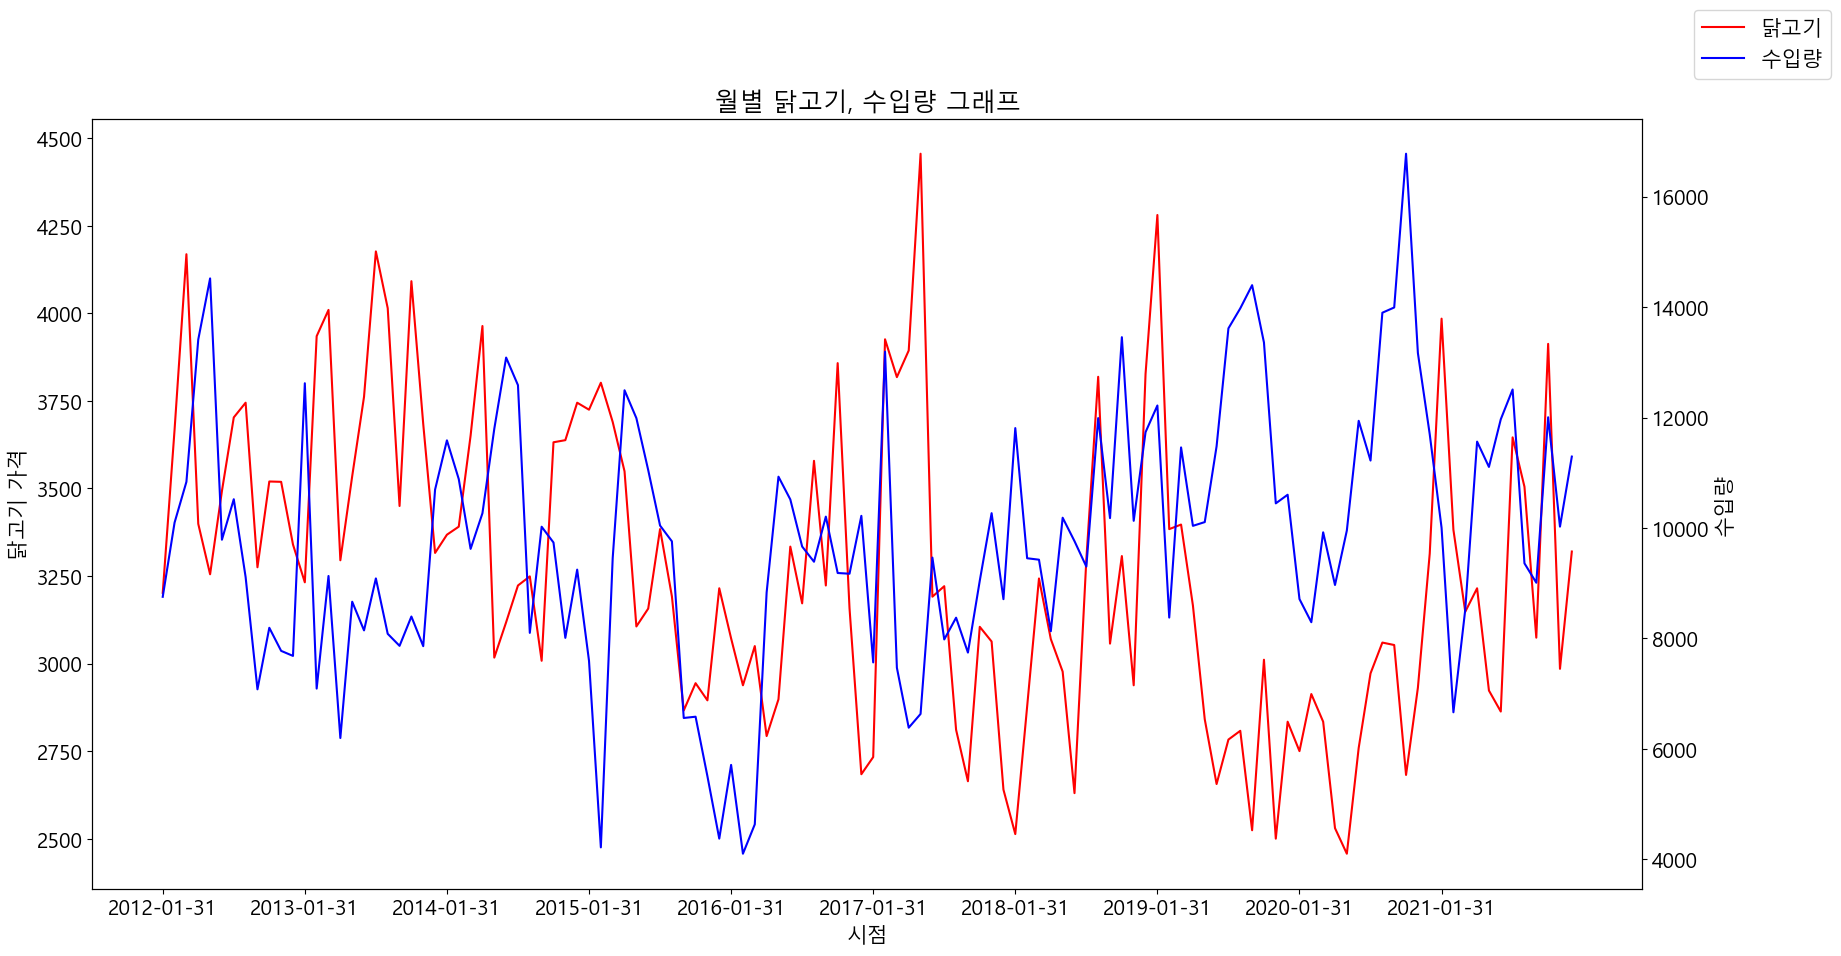

In [232]:
# 닭고기 가격, 수입량 기본 그래프

plt.style.use('default')
plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = font_name

x = price_df['date']
y1 = price_df['price']
y2 = income_df['import amount']

fig, ax1 = plt.subplots()
ax1.set_title('월별 닭고기, 수입량 그래프')
ax1.set_xlabel('시점')
ax1.set_ylabel('닭고기 가격')
ax1.plot(x, y1, color='red',label='닭고기')

ax2 = ax1.twinx()
ax2.set_ylabel('수입량')
ax2.plot(x, y2, color='blue',label='수입량')

plt.xticks(['2012-01-31', '2013-01-31', '2014-01-31','2015-01-31','2016-01-31','2017-01-31', '2018-01-31', '2019-01-31', '2020-01-31', '2021-01-31'])
fig.legend()
# plt.legend()
plt.show()

- 수입량이 떨어질수록 닭고기 올라가고, 수입량이 늘어날수록 닭고기 가격 떨어지는게 보인다
- 단위가 다르므로 정규화 시키기

## 정규화
- MinMaxScaler / StandardScaler 두 가지 방법이 있음
- 두 개 다 돌려보고 정확도가 더 높은 함수를 사용함. 보통 잘 모를때는 StandardScaler 사용함. (해보고 별로면 MinMaxScaler 사용)

- 배열화 처리 먼저 해주기 (numpy 사용)

In [127]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [143]:
# 스케일링 함수
ss = StandardScaler()

#### 닭고기 가격 정규화 값 컬럼 추가 (배열화 > 스케일링 > 차원축소 > 컬럼추가 > 파일저장)

In [233]:
# 닭고기 가격 데이터 배열화 처리
price_df2 = price_df[['price']].to_numpy()
price_df2

array([[3202],
       [3668],
       [4169],
       [3399],
       [3255],
       [3493],
       [3703],
       [3745],
       [3275],
       [3520],
       [3519],
       [3340],
       [3232],
       [3935],
       [4010],
       [3295],
       [3535],
       [3762],
       [4177],
       [4015],
       [3450],
       [4092],
       [3684],
       [3316],
       [3368],
       [3391],
       [3651],
       [3964],
       [3017],
       [3118],
       [3223],
       [3249],
       [3008],
       [3632],
       [3638],
       [3745],
       [3725],
       [3802],
       [3690],
       [3549],
       [3106],
       [3157],
       [3384],
       [3192],
       [2866],
       [2944],
       [2895],
       [3215],
       [3072],
       [2938],
       [3050],
       [2793],
       [2898],
       [3334],
       [3172],
       [3579],
       [3223],
       [3858],
       [3158],
       [2684],
       [2733],
       [3926],
       [3818],
       [3894],
       [4456],
       [3191],
       [32

In [234]:
ss.fit(price_df2)
priceScale=ss.transform(price_df2)
priceScale

array([[-0.15938547],
       [ 0.91251299],
       [ 2.06491884],
       [ 0.29375615],
       [-0.03747428],
       [ 0.50997601],
       [ 0.99302038],
       [ 1.08962926],
       [ 0.00852995],
       [ 0.57208172],
       [ 0.56978151],
       [ 0.15804368],
       [-0.09037914],
       [ 1.5266694 ],
       [ 1.69918525],
       [ 0.05453418],
       [ 0.60658489],
       [ 1.12873285],
       [ 2.08332053],
       [ 1.7106863 ],
       [ 0.41106693],
       [ 1.88780257],
       [ 0.94931637],
       [ 0.10283861],
       [ 0.2224496 ],
       [ 0.27535446],
       [ 0.8734094 ],
       [ 1.59337553],
       [-0.58492456],
       [-0.35260322],
       [-0.11108104],
       [-0.05127554],
       [-0.60562646],
       [ 0.82970538],
       [ 0.84350665],
       [ 1.08962926],
       [ 1.04362503],
       [ 1.2207413 ],
       [ 0.96311764],
       [ 0.63878784],
       [-0.38020576],
       [-0.26289498],
       [ 0.25925298],
       [-0.18238759],
       [-0.93225647],
       [-0

In [235]:
# 2차원 -> 1차원 리스트에 담기
price_list=[]
for i in priceScale :
    price_list.append(i[0])

price_list

[-0.1593854739813105,
 0.9125129872375594,
 2.064918843612353,
 0.2937561501820315,
 -0.037474275602340325,
 0.5099760114579408,
 0.9930203823934831,
 1.0896292565805914,
 0.008529950201044646,
 0.5720817162925106,
 0.5697815050023413,
 0.1580436840620458,
 -0.09037913527623305,
 1.5266694017127487,
 1.6991852484754424,
 0.05453417600442962,
 0.6065848856450493,
 1.1287328485134687,
 2.083320533933707,
 1.7106863049262886,
 0.41106692598066313,
 1.8878025742693207,
 0.9493163678802673,
 0.10283861309798384,
 0.22244960018678478,
 0.27535445986067747,
 0.8734093953046821,
 1.593375529127657,
 -0.5849245626626215,
 -0.3526032223555274,
 -0.11108103688775628,
 -0.051275543343355816,
 -0.6056264642741448,
 0.8297053807914664,
 0.8435066485324819,
 1.0896292565805914,
 1.0436250307772066,
 1.2207413001202387,
 0.9631176356212828,
 0.6387878437074188,
 -0.3802057578375584,
 -0.2628949820389267,
 0.2592529808294928,
 -0.182387586883003,
 -0.932256467478178,
 -0.7528399868449767,
 -0.865550340

In [236]:
price_df['price_ss'] = price_list
price_df

,Unnamed: 0,date,price,price_ss
0,0,2012-01-31,3202,-0.159385
1,1,2012-02-29,3668,0.912513
2,2,2012-03-31,4169,2.064919
3,3,2012-04-30,3399,0.293756
4,4,2012-05-31,3255,-0.037474
...,...,...,...,...
115,115,2021-08-31,3505,0.537579
116,116,2021-09-30,3074,-0.453813
117,117,2021-10-31,3913,1.476065
118,118,2021-11-30,2985,-0.658531


In [246]:
price_df = price_df.drop(['Unnamed: 0'],axis=1)
price_df

,date,price,price_ss
0,2012-01-31,3202,-0.159385
1,2012-02-29,3668,0.912513
2,2012-03-31,4169,2.064919
3,2012-04-30,3399,0.293756
4,2012-05-31,3255,-0.037474
...,...,...,...
115,2021-08-31,3505,0.537579
116,2021-09-30,3074,-0.453813
117,2021-10-31,3913,1.476065
118,2021-11-30,2985,-0.658531


In [247]:
# 닭고기 가격 표준화 컬럼 추가한 데이터 파일 저장
price_df.to_csv('./pre_data/닭고기가격_표준화.csv',encoding='utf-8', index=False)

#### 수입량 정규화 값 컬럼 추가 (배열화 > 스케일링 > 차원축소 > 컬럼추가)

In [237]:
# 수입량 데이터 배열화 처리
income_df2 = income_df[['import amount']].to_numpy()

In [238]:
ss.fit(income_df2)
incomeScale=ss.transform(income_df2)
incomeScale

array([[-0.46438818],
       [ 0.11485796],
       [ 0.43292615],
       [ 1.54314791],
       [ 2.0202502 ],
       [-0.01874792],
       [ 0.29716534],
       [-0.31052592],
       [-1.18629091],
       [-0.70617172],
       [-0.88632417],
       [-0.92554396],
       [ 1.20223742],
       [-1.18068809],
       [-0.30190619],
       [-1.56642119],
       [-0.502746  ],
       [-0.7264281 ],
       [-0.3208696 ],
       [-0.75314927],
       [-0.84710438],
       [-0.61825043],
       [-0.8496903 ],
       [ 0.37215702],
       [ 0.75659717],
       [ 0.45447548],
       [-0.09029172],
       [ 0.18769471],
       [ 0.8462424 ],
       [ 1.40264624],
       [ 1.18715289],
       [-0.7458225 ],
       [ 0.08253395],
       [-0.04072824],
       [-0.7846113 ],
       [-0.25234272],
       [-0.96390177],
       [-2.41977487],
       [-0.16312847],
       [ 1.14750211],
       [ 0.92985382],
       [ 0.52429533],
       [ 0.09158468],
       [-0.03167752],
       [-1.40997302],
       [-1

In [240]:
# 2차원 -> 1차원 리스트에 담기
income_list=[]
for i in incomeScale :
    income_list.append(i[0])

income_list

[-0.4643881782123418,
 0.11485795776667201,
 0.4329261485051484,
 1.5431479091315916,
 2.020250195239306,
 -0.01874792181182076,
 0.297165335385067,
 -0.3105259233429163,
 -1.1862909146445206,
 -0.706171721578582,
 -0.8863241656553884,
 -0.9255439561123008,
 1.202237422852276,
 -1.18068808743639,
 -0.3019061891765619,
 -1.5664211913807484,
 -0.5027459952526188,
 -0.7264280968695147,
 -0.3208696043425415,
 -0.7531492727852133,
 -0.8471043751984759,
 -0.6182504330817674,
 -0.8496902954483823,
 0.37215702263235,
 0.756597166451755,
 0.4544754839210343,
 -0.09029171539256205,
 0.18769471147236647,
 0.8462424017818405,
 1.4026462422200152,
 1.187152888061156,
 -0.7458224987438121,
 0.08253395464284312,
 -0.04072824393602441,
 -0.7846113024924067,
 -0.25234271772002426,
 -0.9639017731525777,
 -2.419774873849831,
 -0.1631284690982565,
 1.1475021108959258,
 0.9298538231954779,
 0.5242953306685048,
 0.0915846755175152,
 -0.03167752306135232,
 -1.4099730162614166,
 -1.4000603219701089,
 -1.86466

In [241]:
income_df['income_ss'] = income_list
income_df.head()

,date,import amount,income_ss
0,2012-01-31,8754,-0.464388
1,2012-02-29,10098,0.114858
2,2012-03-31,10836,0.432926
3,2012-04-30,13412,1.543148
4,2012-05-31,14519,2.020250


In [248]:
# 닭고기 가격 표준화 컬럼 추가한 데이터 파일 저장
income_df.to_csv('./pre_data/수입량_표준화.csv',encoding='utf-8', index=False)

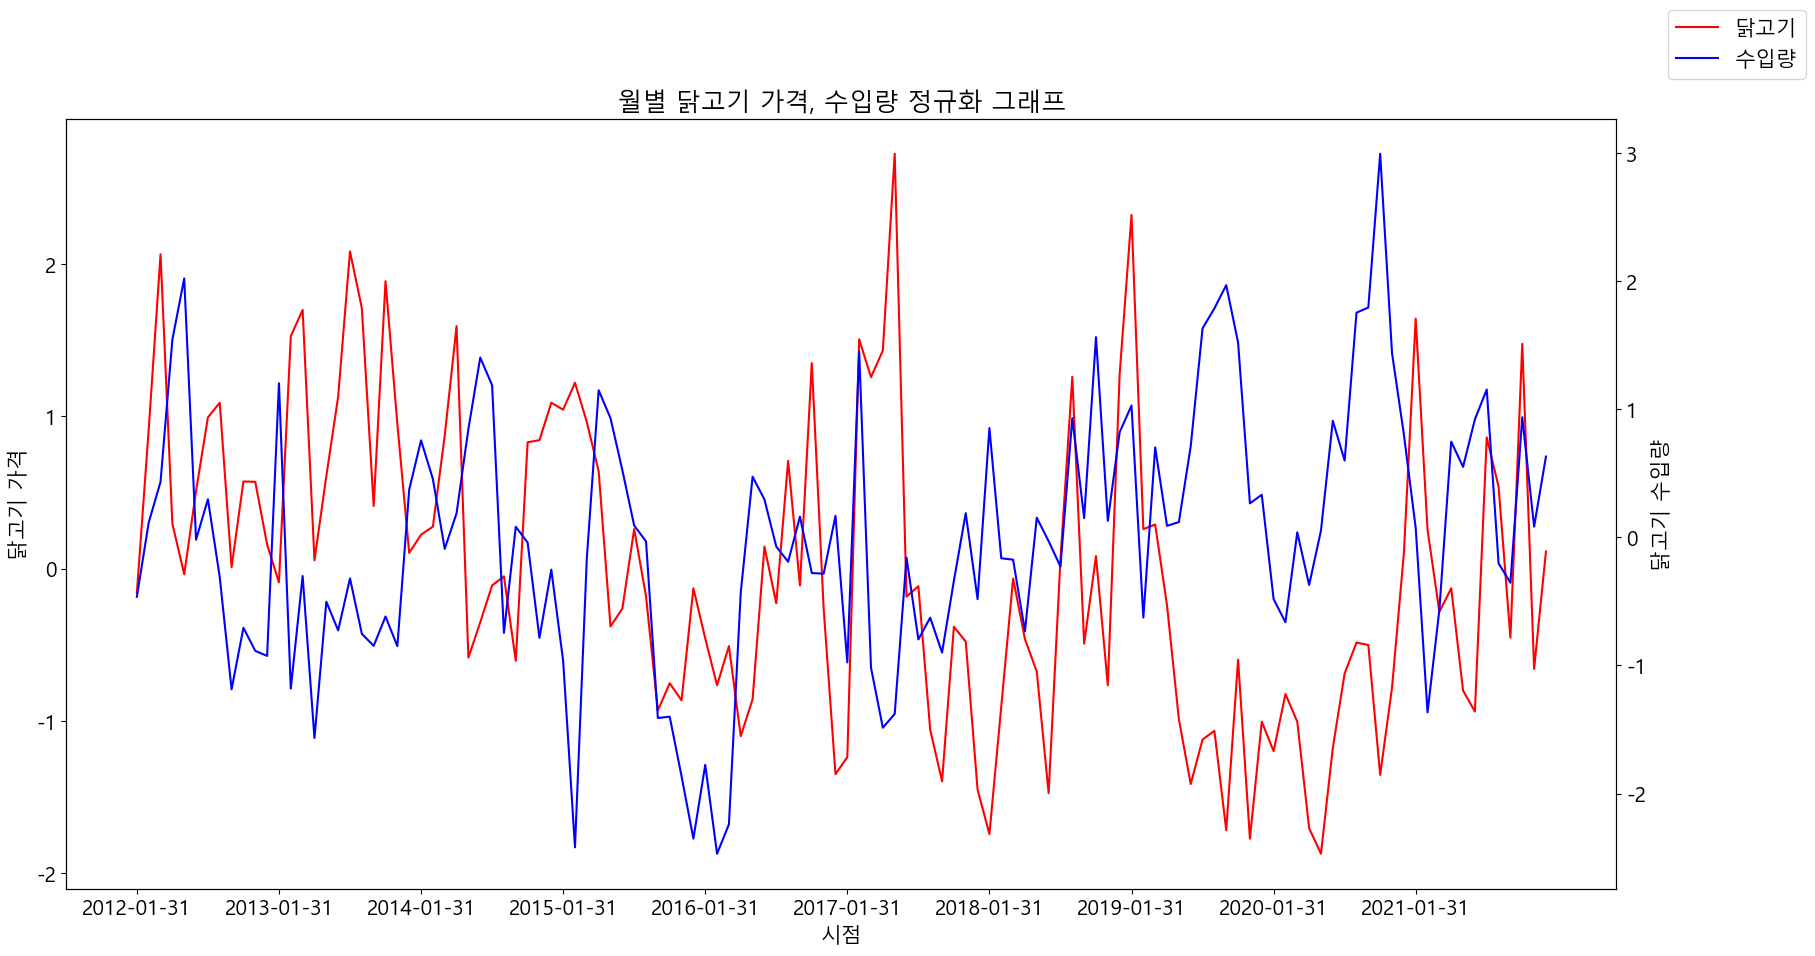

In [243]:
# 월별 닭고기, 수입량 정규화 그래프

plt.style.use('default')
plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = font_name
matplotlib.rcParams['axes.unicode_minus'] = False 

x = price_df['date']
y1 = price_df['price_ss']
y2 = income_df['income_ss']

fig, ax1 = plt.subplots()
ax1.set_title('월별 닭고기 가격, 수입량 정규화 그래프')
ax1.set_xlabel('시점')
ax1.set_ylabel('닭고기 가격')
ax1.plot(x, y1, color='red',label='닭고기')

ax2 = ax1.twinx()
ax2.set_ylabel('닭고기 수입량')
ax2.plot(x, y2, color='blue',label='수입량')

plt.xticks(['2012-01-31', '2013-01-31', '2014-01-31','2015-01-31','2016-01-31','2017-01-31', '2018-01-31', '2019-01-31', '2020-01-31', '2021-01-31'])
fig.legend()
plt.show()

In [249]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols

In [250]:
price_df

,date,price,price_ss
0,2012-01-31,3202,-0.159385
1,2012-02-29,3668,0.912513
2,2012-03-31,4169,2.064919
3,2012-04-30,3399,0.293756
4,2012-05-31,3255,-0.037474
...,...,...,...
115,2021-08-31,3505,0.537579
116,2021-09-30,3074,-0.453813
117,2021-10-31,3913,1.476065
118,2021-11-30,2985,-0.658531


In [251]:
income_df

,date,import amount,income_ss
0,2012-01-31,8754,-0.464388
1,2012-02-29,10098,0.114858
2,2012-03-31,10836,0.432926
3,2012-04-30,13412,1.543148
4,2012-05-31,14519,2.020250
...,...,...,...
115,2021-08-31,9360,-0.203210
116,2021-09-30,9009,-0.354487
117,2021-10-31,12005,0.936750
118,2021-11-30,10025,0.083396


In [254]:
price_income_df = pd.merge( price_df, income_df, how='right', left_on='date', right_on='date')   #열방향(axis=1), 교집합(inner)
print(price_income_df)

           date  price  price_ss  import amount  income_ss
0    2012-01-31   3202 -0.159385           8754  -0.464388
1    2012-02-29   3668  0.912513          10098   0.114858
2    2012-03-31   4169  2.064919          10836   0.432926
3    2012-04-30   3399  0.293756          13412   1.543148
4    2012-05-31   3255 -0.037474          14519   2.020250
..          ...    ...       ...            ...        ...
115  2021-08-31   3505  0.537579           9360  -0.203210
116  2021-09-30   3074 -0.453813           9009  -0.354487
117  2021-10-31   3913  1.476065          12005   0.936750
118  2021-11-30   2985 -0.658531          10025   0.083396
119  2021-12-31   3320  0.112039          11293   0.629887

[120 rows x 5 columns]


In [258]:
price_income_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           120 non-null    object 
 1   price          120 non-null    int64  
 2   price_ss       120 non-null    float64
 3   import amount  120 non-null    int64  
 4   income_ss      120 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 5.6+ KB


In [275]:
price_income_df.rename(columns = {'import amount':'import_amount'}, inplace=True)
price_income_df

,date,price,price_ss,import_amount,income_ss
0,2012-01-31,3202,-0.159385,8754,-0.464388
1,2012-02-29,3668,0.912513,10098,0.114858
2,2012-03-31,4169,2.064919,10836,0.432926
3,2012-04-30,3399,0.293756,13412,1.543148
4,2012-05-31,3255,-0.037474,14519,2.020250
...,...,...,...,...,...
115,2021-08-31,3505,0.537579,9360,-0.203210
116,2021-09-30,3074,-0.453813,9009,-0.354487
117,2021-10-31,3913,1.476065,12005,0.936750
118,2021-11-30,2985,-0.658531,10025,0.083396


In [276]:
price_income_df.to_csv('./pre_data/닭고기_수입량_표준화.csv',encoding='utf-8', index=False)

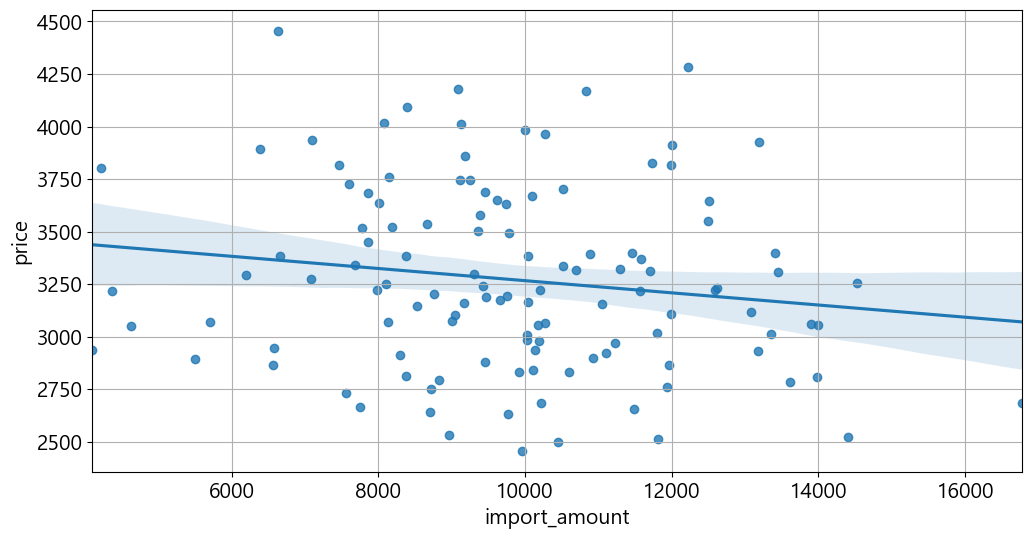

-0.02898553583789775 3556.2629622569575
3556.2339767211197


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     2.893
Date:                Wed, 02 Nov 2022   Prob (F-statistic):             0.0916
Time:                        14:03:16   Log-Likelihood:                -897.79
No. Observations:                 120   AIC:                             1800.
Df Residuals:                     118   BIC:                             1805.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3556.2630    172.141     20.659      0.000    3215.377    3897.149
import_amount    -0.0290      0.017     -1.701      0.092      -0.063       0.005
==============================================================================
Omnibus:                        4.168   Durbin-Watson:                   0.972
Prob(Omnibus):                  0.124   Jarque-Bera (JB):                3.849
Skew:                           0.369   Prob(JB):                        0.146
Kurtosis:                       2.524   Cond. No.                     4.40e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [270]:
#pyplot과 seaborn으로 회귀그래프 
plt.rcParams["figure.figsize"] = (12, 6)
sns.regplot(x='import_amount', y='price', data=price_income_df)
plt.xlim(price_income_df['import_amount'].min()-1, price_income_df['import_amount'].max()+1)
plt.grid()
plt.show()
 
z=np.polyfit(price_income_df['import_amount'], price_income_df['price'], 1) # 기울기와 절편 확인
f=np.poly1d(z) # f(x): f함수에 x값을 넣으면 y값을 계산해 줌
print(z[0], z[1])
print(f(1))
 
#statsmodel을 통해 회귀식의 회귀계수(기울기, 절편) 확인
ols('price ~ import_amount', data=price_income_df).fit().summary()

- Prob (F-statistic):	0.0916 > 0.05 보다 크므로 유의하지않다
- 수입량의 기울기 값은 -0.0290
- y 절편 값은 3556.2630


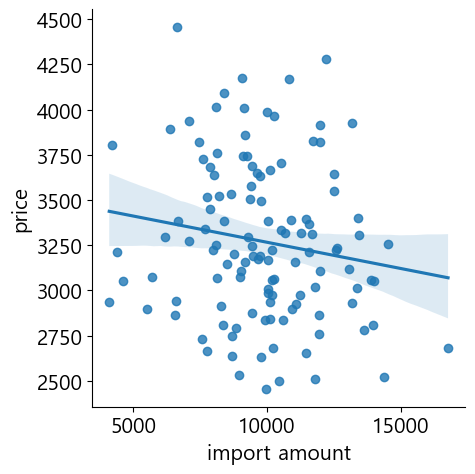

In [261]:
sns.lmplot(x='import amount', y='price', data=price_income_df)

In [272]:
# 통계량 분석위한 라이브러리 가져오기

from sklearn.linear_model import LinearRegression

# 데이터 행렬로 만들기

income_amount = np.array(price_income_df.loc[:, 'import_amount']).reshape((-1,1))
price = np.array(price_income_df.loc[:, 'price']).reshape((-1,1))

# function 사용하여 선형회귀선 값 나타내기

model = LinearRegression()
model.fit(income_amount, price) 
r_sq = model.score(income_amount, price)
print ('coefficient of determination is ', r_sq)

coefficient of determination is  0.023931525032412915


In [273]:
# p-value 계산하기

import statsmodels.api as sm
mod = sm.OLS(income_amount, price)
fii = mod.fit()
p_value = fii.summary2().tables[1]['P>|t|']

print ('p-value for the regression is  ',  p_value)
print ('p-value for the regression is %0.9f ' % p_value)

p-value for the regression is   x1    1.069552e-67
Name: P>|t|, dtype: float64
p-value for the regression is 0.000000000 


- p < 0.05 이므로 회귀분석은 유의미 하지만 설명력이 부족함 ~~

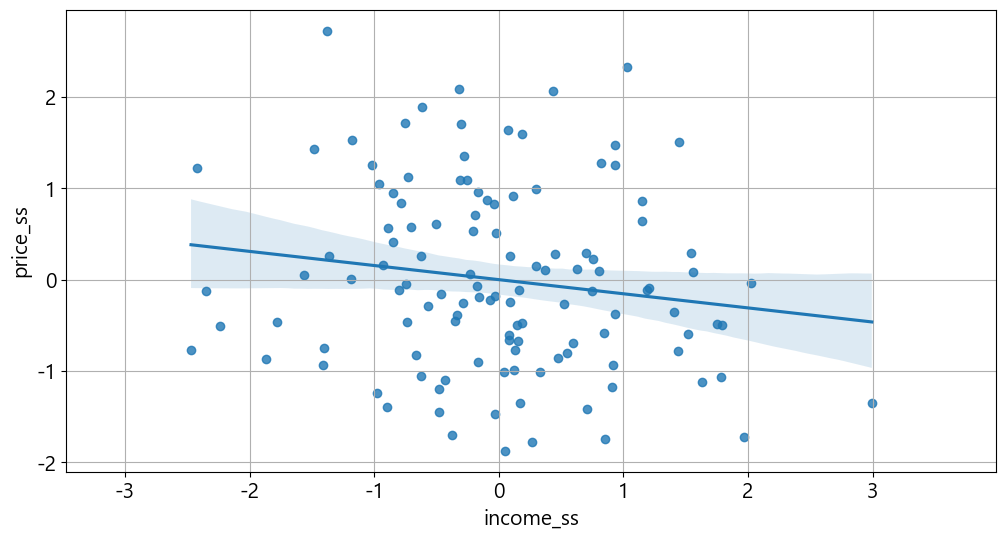

-0.15469817397892235 3.4458671018766005e-16
-0.15469817397892202


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               price_ss   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     2.893
Date:                Wed, 02 Nov 2022   Prob (F-statistic):             0.0916
Time:                        12:40:52   Log-Likelihood:                -168.82
No. Observations:                 120   AIC:                             341.6
Df Residuals:                     118   BIC:                             347.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.261e-16      0.091   3.59e-15      1.000      -0.180       0.180
income_ss     -0.1547      0.091     -1.701      0.092      -0.335       0.025
==============================================================================
Omnibus:                        4.168   Durbin-Watson:                   0.972
Prob(Omnibus):                  0.124   Jarque-Bera (JB):                3.849
Skew:                           0.369   Prob(JB):                        0.146
Kurtosis:                       2.524   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [255]:
 #pyplot과 seaborn으로 회귀그래프 
plt.rcParams["figure.figsize"] = (12, 6)
sns.regplot(x='income_ss', y='price_ss', data=price_income_df)  # x = 독립변수 y = 종속변수 
plt.xlim(price_income_df['income_ss'].min()-1, price_income_df['income_ss'].max()+1)
plt.grid()
plt.show()
 
z=np.polyfit(price_income_df['income_ss'], price_income_df['price_ss'], 1) # 기울기와 절편 확인
f=np.poly1d(z) # f(x): f함수에 x값을 넣으면 y값을 계산해 줌
print(z[0], z[1])
print(f(1))
 
#statsmodel을 통해 회귀식의 회귀계수(기울기, 절편) 확인
ols('price_ss ~ income_ss', data=price_income_df).fit().summary()

- Prob (F-statistic):	0.0916 > 0.05 보다 크므로 유의하지않다
- 수입량의 기울기 값은 -0.1547
- y 절편 값은 3.261e-16 거의 0이라고 봐도 됨

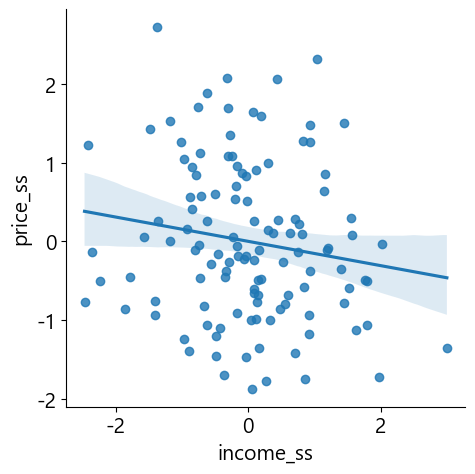

In [260]:
sns.lmplot(x='income_ss', y='price_ss', data=price_income_df)

In [266]:
# 통계량 분석위한 라이브러리 가져오기

from sklearn.linear_model import LinearRegression

# 데이터 행렬로 만들기

income_amount_ss = np.array(price_income_df.loc[:, 'income_ss']).reshape((-1,1))
price_ss = np.array(price_income_df.loc[:, 'price_ss']).reshape((-1,1))

# function 사용하여 선형회귀선 값 나타내기

model = LinearRegression()
model.fit(income_amount_ss, price_ss) 
r_sq = model.score(income_amount_ss, price_ss)
print ('coefficient of determination is ', r_sq)

coefficient of determination is  0.023931525032412915


In [267]:
# p-value 계산하기

import statsmodels.api as sm
mod = sm.OLS(income_amount_ss, price_ss)
fii = mod.fit()
p_value = fii.summary2().tables[1]['P>|t|']

print ('p-value for the regression is  ',  p_value)
print ('p-value for the regression is %0.9f ' % p_value)

p-value for the regression is   x1    0.090221
Name: P>|t|, dtype: float64
p-value for the regression is 0.090221292 


In [277]:
price_income_df

,date,price,price_ss,import_amount,income_ss
0,2012-01-31,3202,-0.159385,8754,-0.464388
1,2012-02-29,3668,0.912513,10098,0.114858
2,2012-03-31,4169,2.064919,10836,0.432926
3,2012-04-30,3399,0.293756,13412,1.543148
4,2012-05-31,3255,-0.037474,14519,2.020250
...,...,...,...,...,...
115,2021-08-31,3505,0.537579,9360,-0.203210
116,2021-09-30,3074,-0.453813,9009,-0.354487
117,2021-10-31,3913,1.476065,12005,0.936750
118,2021-11-30,2985,-0.658531,10025,0.083396


In [282]:
price_income_df['price_ss'].mean()

3.6267285471088446e-16

In [283]:
price_income_df['price_ss_dist'] = price_income_df['price_ss'] - price_income_df['price_ss'].mean()
price_income_df['price_ss_dist']

0     -0.159385
1      0.912513
2      2.064919
3      0.293756
4     -0.037474
         ...   
115    0.537579
116   -0.453813
117    1.476065
118   -0.658531
119    0.112039
Name: price_ss_dist, Length: 120, dtype: float64

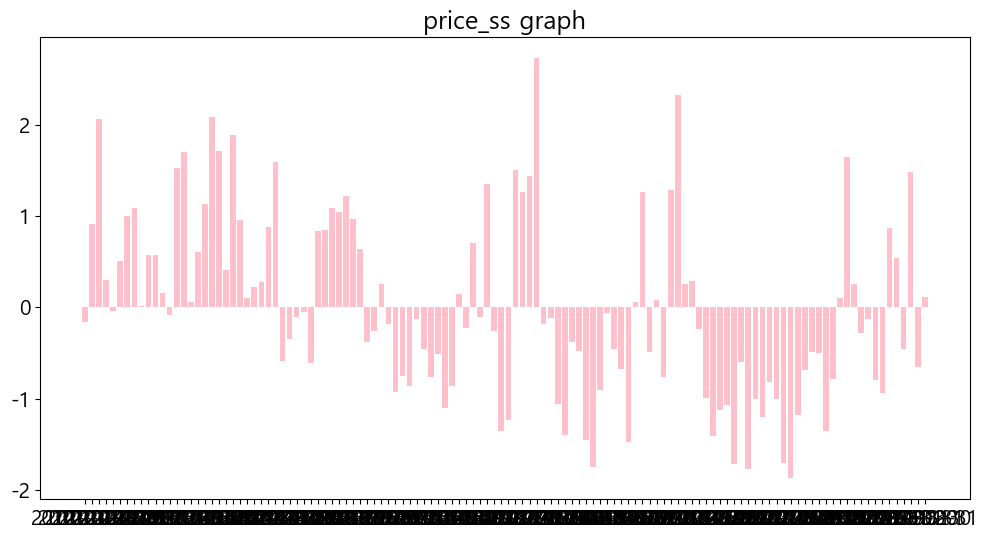

In [295]:
list_x = price_income_df['date']
list_y = price_income_df['price_ss_dist']

plt.title('price_ss graph')
plt.bar(list_x, list_y,
        color='pink')

plt.show()

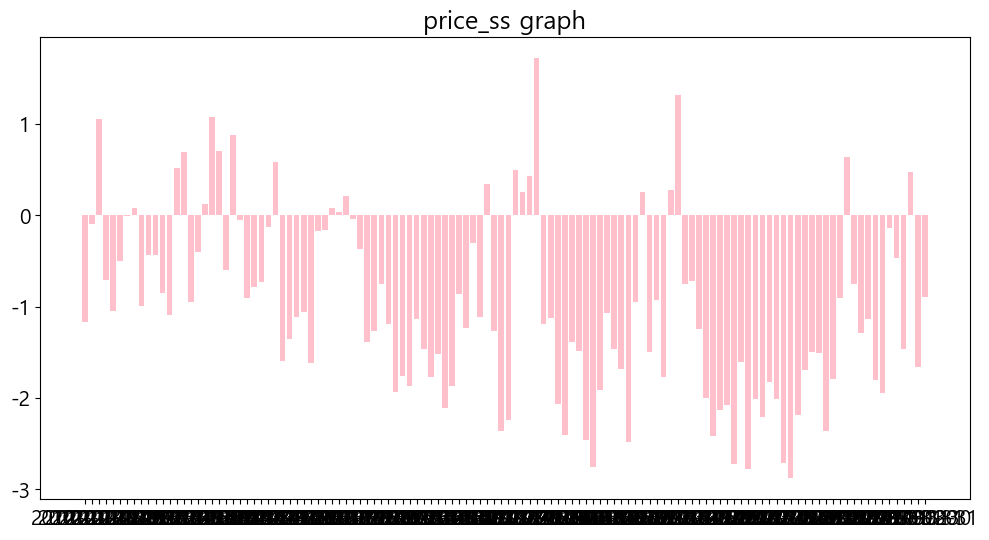

In [294]:
import matplotlib.pyplot as plt


list_x = price_income_df['date']
list_y = price_income_df['price_ss_dist_std']

plt.title('price_ss graph')
plt.bar(list_x, list_y,
        color='pink')

plt.show()

In [287]:
price_income_df['income_ss'].mean()

7.401486830834377e-18

In [288]:
price_income_df['income_ss_dist'] = price_income_df['income_ss'] - price_income_df['income_ss'].mean()
price_income_df['income_ss_dist']

0     -0.464388
1      0.114858
2      0.432926
3      1.543148
4      2.020250
         ...   
115   -0.203210
116   -0.354487
117    0.936750
118    0.083396
119    0.629887
Name: income_ss_dist, Length: 120, dtype: float64

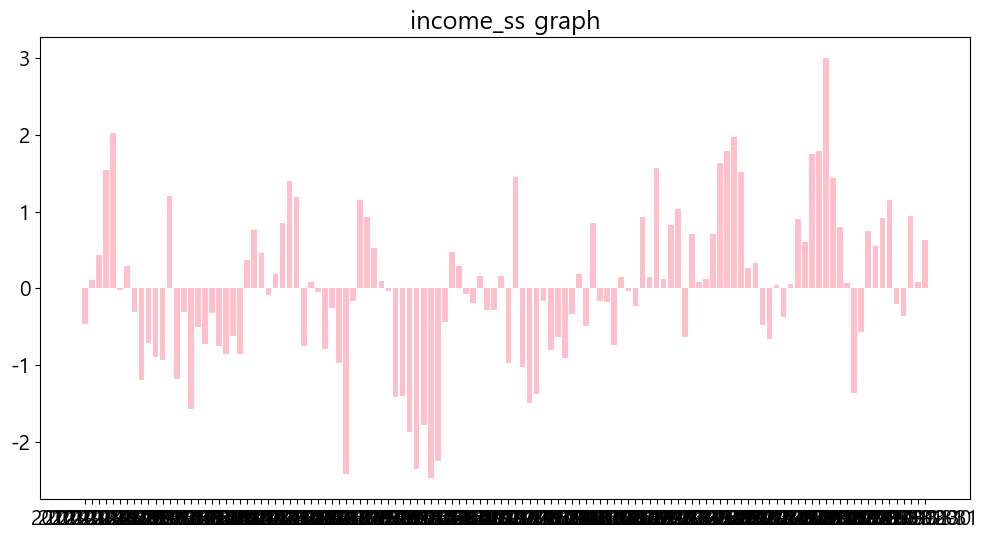

In [291]:
import matplotlib.pyplot as plt

list_x = price_income_df['date']
list_y = price_income_df['income_ss_dist']

plt.title('income_ss graph')
plt.bar(list_x, list_y,
        color='pink')

plt.show()

### 그룹별 정규화 그래프

##### 그래프를 설명할 기준, 지수화 시키기 위한 기준
- 정규화 된 [ 닭고기 평균 값 / 수입량 평균 값 ] 구하기
- 각 값들이 평균으로부터 떨어진 거리 (분산 or 표준편차) 구하기
- 평균 - 평균 후 값들이 떨어진 거리들도 같이 계산하기 

-생각해볼 부분
- 평균대비 해석해도 가능 꼭지점 기준으로 해도되고 그래프도 가능...
- 파란거 평균 선 으로 해석 가능
- 평균 대비 폭 >> 평균끼리 차이점 구가늬 플마값을 거리 절대값

##### 정규화 그래프 시각화

- 수입량이 떨어질수록 닭고기 올라가고, 수입량이 늘어날수록 닭고기 가격 떨어지는게 보인다
- 파란색(수입량)의 평균을 구해서 수입량이 평균으로 부터 떨어진 거리 구해두기

##### 그룹별 정규화된 수입량, 닭고기 가격 값 평균 구하기

##### 그룹별 정규화된 수입량, 닭고기 가격 값 평균으로부터 떨어진 거리 구하기

##### 거리 그래프 그리기

## 닭고기 - 수입량 나온 값을 그 값들의 평균을 내서, 평균으로부터의 값들의 거리를 계산
- 거리를 양수값으로 변경해도 될듯 (절댓값 사용)
- 그거에 대한 범주화 하기

### 닭고기 가격에 변동이 되는 이벤트 시점을 찾아보기
- 물가동향, 금리인상, 복날, 전쟁

### 22년도 데이터들로 학습 모델에 테스트 해보기

## 22.11.09 2차 데이터 전처리
- 13, 25 기온 처리 / 폭염 한파 일수

In [12]:
# 월별 데이터 통합
month_df = pd.read_csv('./pre_data/월별_통합.csv')

In [596]:
month_df

,Unnamed: 0,date,닭고기가격,병아리(원/수),일별_평균기온,일별_최저기온,일별_최고기온,13도미만_평균기온,13도미만_최저기온,13도미만_최고기온,...,hot_day,cold_day,import amount,feedprice,Dubai,Brent,WTI,oil_avg,count,도축
0,0,2012-01-31,3202,250,-1.5,-6.2,3.6,-1.5,-6.2,3.6,...,NaN,4.0,8754,533,109.456667,111.452381,100.289286,107.066111,356,58873
1,1,2012-02-29,3668,420,-1.1,-6.2,4.5,-1.1,-6.2,4.5,...,NaN,3.0,10098,529,116.180952,119.060000,102.370952,112.537302,672,55879
2,2,2012-03-31,4169,500,5.4,0.7,10.4,5.4,0.7,10.4,...,NaN,NaN,10836,527,122.487273,124.544545,106.205000,117.745606,870,58750
3,3,2012-04-30,3399,332,12.4,6.4,18.7,12.4,6.4,18.7,...,NaN,NaN,13412,526,117.338500,120.486500,103.346000,113.723667,718,60940
4,4,2012-05-31,3255,200,18.1,12.6,24.4,NaN,NaN,NaN,...,NaN,NaN,14519,526,107.719348,110.288696,94.546087,104.184710,496,73505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,115,2021-08-31,3505,312,24.8,21.5,29.2,NaN,NaN,NaN,...,3.0,NaN,9360,492,69.518864,70.513636,67.711364,69.247955,670,89892
116,116,2021-09-30,3074,408,21.3,17.7,25.8,NaN,NaN,NaN,...,NaN,NaN,9009,503,72.628182,74.876364,71.420909,72.975152,479,81026
117,117,2021-10-31,3913,447,15.1,10.4,21.2,NaN,NaN,NaN,...,NaN,NaN,12005,508,81.610952,83.746190,81.222857,82.193333,591,81228
118,118,2021-11-30,2985,315,8.3,3.3,14.5,8.3,3.3,14.5,...,NaN,NaN,10025,520,80.317500,80.849545,78.409091,79.858712,652,86819


In [13]:
month_df = month_df.rename(columns={'price':'닭고기가격',
                                    '평균기온_x':'일별_평균기온','최저기온_x':'일별_최저기온','최고기온_x':'일별_최고기온',
                                    '평균기온_y':'13도미만_평균기온','최저기온_y':'13도미만_최저기온','최고기온_y':'13도미만_최고기온',
                                    '평균기온': '25도이상_평균기온', '최저기온':'25도이상_최저기온', '최고기온':'25도이상_최고기온'})

In [14]:
month_df.drop(columns=['Unnamed: 0', '일별_평균기온', '일별_최저기온', '일별_최고기온', 'Dubai', 'Brent', 'WTI'],inplace=True)
month_df.columns

Index(['date', '닭고기가격', '병아리(원/수)', '13도미만_평균기온', '13도미만_최저기온', '13도미만_최고기온',
       '25도이상_평균기온', '25도이상_최저기온', '25도이상_최고기온', 'hot_day', 'cold_day',
       'import amount', 'feedprice', 'oil_avg', 'count', '도축'],
      dtype='object')

In [15]:
month_df.drop(columns=['13도미만_최저기온', '13도미만_최고기온', '25도이상_최저기온', '25도이상_최고기온' ],inplace=True)
month_df.columns

Index(['date', '닭고기가격', '병아리(원/수)', '13도미만_평균기온', '25도이상_평균기온', 'hot_day',
       'cold_day', 'import amount', 'feedprice', 'oil_avg', 'count', '도축'],
      dtype='object')

In [16]:
month_df

,date,닭고기가격,병아리(원/수),13도미만_평균기온,25도이상_평균기온,hot_day,cold_day,import amount,feedprice,oil_avg,count,도축
0,2012-01-31,3202,250,-1.5,NaN,NaN,4.0,8754,533,107.066111,356,58873
1,2012-02-29,3668,420,-1.1,NaN,NaN,3.0,10098,529,112.537302,672,55879
2,2012-03-31,4169,500,5.4,NaN,NaN,NaN,10836,527,117.745606,870,58750
3,2012-04-30,3399,332,12.4,NaN,NaN,NaN,13412,526,113.723667,718,60940
4,2012-05-31,3255,200,NaN,NaN,NaN,NaN,14519,526,104.184710,496,73505
...,...,...,...,...,...,...,...,...,...,...,...,...
115,2021-08-31,3505,312,NaN,NaN,3.0,NaN,9360,492,69.247955,670,89892
116,2021-09-30,3074,408,NaN,NaN,NaN,NaN,9009,503,72.975152,479,81026
117,2021-10-31,3913,447,NaN,NaN,NaN,NaN,12005,508,82.193333,591,81228
118,2021-11-30,2985,315,8.3,NaN,NaN,NaN,10025,520,79.858712,652,86819


In [17]:
month_df.to_csv('./pre_data/월별_통합_전처리2.csv')

In [602]:
month_df.columns

Index(['date', '닭고기가격', '병아리(원/수)', '13도미만_평균기온', '25도이상_평균기온', 'hot_day',
       'cold_day', 'import amount', 'feedprice', 'oil_avg', 'count', '도축'],
      dtype='object')

In [603]:
month_df['13도미만_평균기온'] = month_df['13도미만_평균기온']-13
month_df['25도이상_평균기온'] = month_df['25도이상_평균기온']-25

In [604]:
month_df

,date,닭고기가격,병아리(원/수),13도미만_평균기온,25도이상_평균기온,hot_day,cold_day,import amount,feedprice,oil_avg,count,도축
0,2012-01-31,3202,250,-14.5,NaN,NaN,4.0,8754,533,107.066111,356,58873
1,2012-02-29,3668,420,-14.1,NaN,NaN,3.0,10098,529,112.537302,672,55879
2,2012-03-31,4169,500,-7.6,NaN,NaN,NaN,10836,527,117.745606,870,58750
3,2012-04-30,3399,332,-0.6,NaN,NaN,NaN,13412,526,113.723667,718,60940
4,2012-05-31,3255,200,NaN,NaN,NaN,NaN,14519,526,104.184710,496,73505
...,...,...,...,...,...,...,...,...,...,...,...,...
115,2021-08-31,3505,312,NaN,NaN,3.0,NaN,9360,492,69.247955,670,89892
116,2021-09-30,3074,408,NaN,NaN,NaN,NaN,9009,503,72.975152,479,81026
117,2021-10-31,3913,447,NaN,NaN,NaN,NaN,12005,508,82.193333,591,81228
118,2021-11-30,2985,315,-4.7,NaN,NaN,NaN,10025,520,79.858712,652,86819


In [18]:
month_df = month_df.fillna(0)
month_df

,date,닭고기가격,병아리(원/수),13도미만_평균기온,25도이상_평균기온,hot_day,cold_day,import amount,feedprice,oil_avg,count,도축
0,2012-01-31,3202,250,-1.5,0.0,0.0,4.0,8754,533,107.066111,356,58873
1,2012-02-29,3668,420,-1.1,0.0,0.0,3.0,10098,529,112.537302,672,55879
2,2012-03-31,4169,500,5.4,0.0,0.0,0.0,10836,527,117.745606,870,58750
3,2012-04-30,3399,332,12.4,0.0,0.0,0.0,13412,526,113.723667,718,60940
4,2012-05-31,3255,200,0.0,0.0,0.0,0.0,14519,526,104.184710,496,73505
...,...,...,...,...,...,...,...,...,...,...,...,...
115,2021-08-31,3505,312,0.0,0.0,3.0,0.0,9360,492,69.247955,670,89892
116,2021-09-30,3074,408,0.0,0.0,0.0,0.0,9009,503,72.975152,479,81026
117,2021-10-31,3913,447,0.0,0.0,0.0,0.0,12005,508,82.193333,591,81228
118,2021-11-30,2985,315,8.3,0.0,0.0,0.0,10025,520,79.858712,652,86819


In [606]:
corr_m_data = month_df.corr()
corr_m_data

,닭고기가격,병아리(원/수),13도미만_평균기온,25도이상_평균기온,hot_day,cold_day,import amount,feedprice,oil_avg,count,도축
닭고기가격,1.000000,0.445516,-0.094198,0.197547,0.150293,0.021131,-0.154698,0.461750,0.415093,0.038797,-0.403027
병아리(원/수),0.445516,1.000000,-0.100931,-0.064518,-0.105209,-0.063211,-0.199129,-0.213263,-0.111327,0.184980,-0.325786
13도미만_평균기온,-0.094198,-0.100931,1.000000,0.234531,0.284326,-0.707350,0.202789,0.027115,-0.007085,0.442796,0.435949
25도이상_평균기온,0.197547,-0.064518,0.234531,1.000000,0.904086,-0.114456,0.071678,0.012206,0.048307,0.084682,0.262502
hot_day,0.150293,-0.105209,0.284326,0.904086,1.000000,-0.138757,0.089705,-0.013836,0.016038,0.081723,0.387392
cold_day,0.021131,-0.063211,-0.707350,-0.114456,-0.138757,1.000000,-0.008635,0.037891,0.096895,-0.403974,-0.278001
import amount,-0.154698,-0.199129,0.202789,0.071678,0.089705,-0.008635,1.000000,-0.087719,0.078222,0.098413,0.338863
feedprice,0.461750,-0.213263,0.027115,0.012206,-0.013836,0.037891,-0.087719,1.000000,0.836585,-0.151148,-0.440870
oil_avg,0.415093,-0.111327,-0.007085,0.048307,0.016038,0.096895,0.078222,0.836585,1.000000,-0.052721,-0.459850
count,0.038797,0.184980,0.442796,0.084682,0.081723,-0.403974,0.098413,-0.151148,-0.052721,1.000000,0.087217


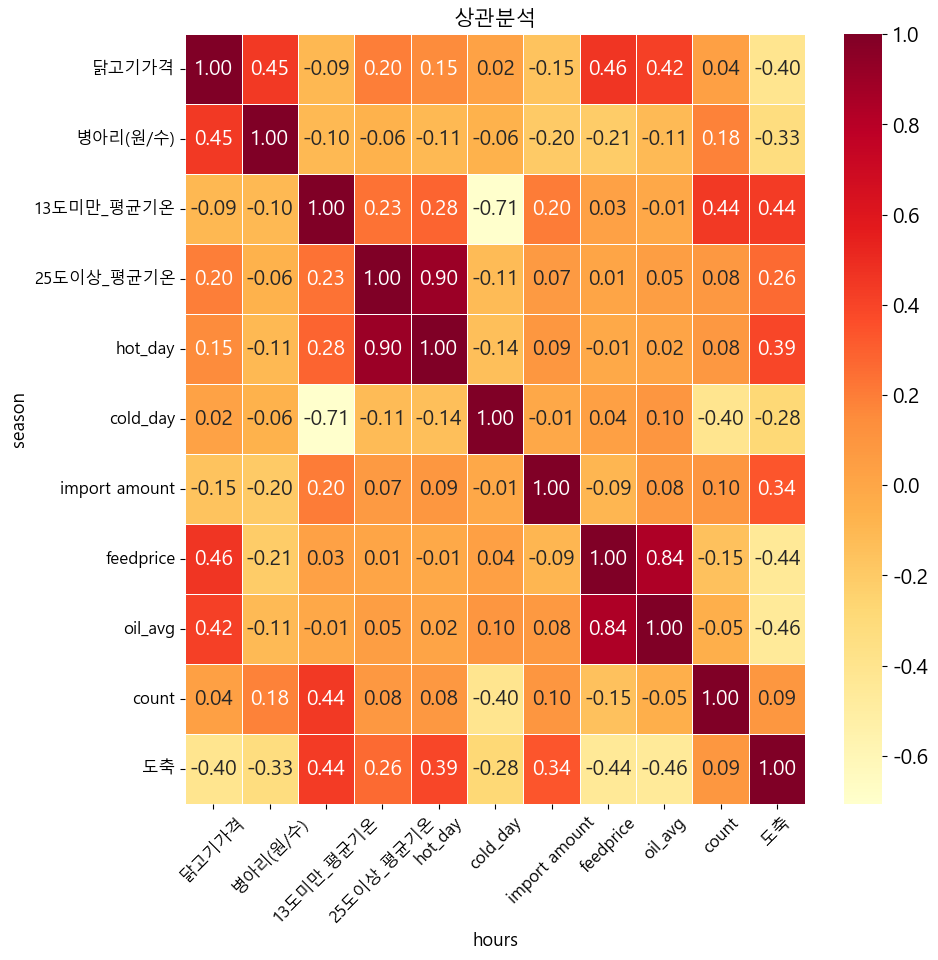

In [607]:
# 히트맵을 그릴 격자 생성
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(corr_m_data, # 위에서 전처리한 데이터프레임
            annot = True, # 숫자 표시 여부
            ax = ax, # 히트맵을 그릴 격자
            linewidths = 0.4, # 선의 굵기
            linecolor = 'white', # 선의 색깔
            fmt = '.2f', # 소수점 포맷팅 형태
            cmap = 'YlOrRd') # colormap 형태

plt.title('상관분석', size = 15)
plt.ylabel('season', size = 13)
plt.xlabel('hours', size = 13) 

plt.xticks(rotation=45, size = 12)
plt.yticks(size=12) 
plt.show()

## 대체제 가격 데이터 전처리

In [19]:
pork = pd.read_csv('./data/2012-2021pork.csv', sep =';', encoding='cp949')
pork

,구분,돼지_소비자가
0,2021-12- 31,"25,177 ▼234"
1,2021-12- 30,"25,411 ▼1,480"
2,2021-12- 29,"26,891 ▼45"
3,2021-12- 28,"26,936 ▼57"
4,2021-12- 27,"26,993 ▲263"
...,...,...
2476,2012-01- 06,"19,570 ▼260"
2477,2012-01- 05,"19,830 ▼470"
2478,2012-01- 04,"20,300 ▼30"
2479,2012-01- 03,"20,330 ▲10"


In [20]:
# 값 없는거 null 으로 변환
pork['돼지_소비자가_null'] = pork['돼지_소비자가'].replace('-', np.NaN)
pork

,구분,돼지_소비자가,돼지_소비자가_null
0,2021-12- 31,"25,177 ▼234","25,177 ▼234"
1,2021-12- 30,"25,411 ▼1,480","25,411 ▼1,480"
2,2021-12- 29,"26,891 ▼45","26,891 ▼45"
3,2021-12- 28,"26,936 ▼57","26,936 ▼57"
4,2021-12- 27,"26,993 ▲263","26,993 ▲263"
...,...,...,...
2476,2012-01- 06,"19,570 ▼260","19,570 ▼260"
2477,2012-01- 05,"19,830 ▼470","19,830 ▼470"
2478,2012-01- 04,"20,300 ▼30","20,300 ▼30"
2479,2012-01- 03,"20,330 ▲10","20,330 ▲10"


In [21]:
pork['돼지_소비자가_int'] = pork['돼지_소비자가_null'].str.split().str[0]
pork

,구분,돼지_소비자가,돼지_소비자가_null,돼지_소비자가_int
0,2021-12- 31,"25,177 ▼234","25,177 ▼234","25,177"
1,2021-12- 30,"25,411 ▼1,480","25,411 ▼1,480","25,411"
2,2021-12- 29,"26,891 ▼45","26,891 ▼45","26,891"
3,2021-12- 28,"26,936 ▼57","26,936 ▼57","26,936"
4,2021-12- 27,"26,993 ▲263","26,993 ▲263","26,993"
...,...,...,...,...
2476,2012-01- 06,"19,570 ▼260","19,570 ▼260","19,570"
2477,2012-01- 05,"19,830 ▼470","19,830 ▼470","19,830"
2478,2012-01- 04,"20,300 ▼30","20,300 ▼30","20,300"
2479,2012-01- 03,"20,330 ▲10","20,330 ▲10","20,330"


In [22]:
pork = pork.drop(columns= ['돼지_소비자가_null'])
pork

,구분,돼지_소비자가,돼지_소비자가_int
0,2021-12- 31,"25,177 ▼234","25,177"
1,2021-12- 30,"25,411 ▼1,480","25,411"
2,2021-12- 29,"26,891 ▼45","26,891"
3,2021-12- 28,"26,936 ▼57","26,936"
4,2021-12- 27,"26,993 ▲263","26,993"
...,...,...,...
2476,2012-01- 06,"19,570 ▼260","19,570"
2477,2012-01- 05,"19,830 ▼470","19,830"
2478,2012-01- 04,"20,300 ▼30","20,300"
2479,2012-01- 03,"20,330 ▲10","20,330"


In [23]:
pork['돼지_소비자가_int'] = pork['돼지_소비자가_int'].str.replace(',','')
pork['돼지_소비자가_int'] = pork['돼지_소비자가_int'].str.replace('-','')
pork

,구분,돼지_소비자가,돼지_소비자가_int
0,2021-12- 31,"25,177 ▼234",25177
1,2021-12- 30,"25,411 ▼1,480",25411
2,2021-12- 29,"26,891 ▼45",26891
3,2021-12- 28,"26,936 ▼57",26936
4,2021-12- 27,"26,993 ▲263",26993
...,...,...,...
2476,2012-01- 06,"19,570 ▼260",19570
2477,2012-01- 05,"19,830 ▼470",19830
2478,2012-01- 04,"20,300 ▼30",20300
2479,2012-01- 03,"20,330 ▲10",20330


In [24]:
# null 값 뒤에 값으로 채우기 (date 내림차순)
pork['돼지_소비자가_int'] = pork['돼지_소비자가_int'].fillna(method='ffill')
pork.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2481 entries, 0 to 2480
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   구분           2481 non-null   object
 1   돼지_소비자가      2481 non-null   object
 2   돼지_소비자가_int  2481 non-null   object
dtypes: object(3)
memory usage: 58.3+ KB


In [25]:
pork['돼지_소비자가_int'] = pd.to_numeric(pork['돼지_소비자가_int'])
pork

,구분,돼지_소비자가,돼지_소비자가_int
0,2021-12- 31,"25,177 ▼234",25177
1,2021-12- 30,"25,411 ▼1,480",25411
2,2021-12- 29,"26,891 ▼45",26891
3,2021-12- 28,"26,936 ▼57",26936
4,2021-12- 27,"26,993 ▲263",26993
...,...,...,...
2476,2012-01- 06,"19,570 ▼260",19570
2477,2012-01- 05,"19,830 ▼470",19830
2478,2012-01- 04,"20,300 ▼30",20300
2479,2012-01- 03,"20,330 ▲10",20330


In [529]:
# 일별 돼지고기 가격 데이터 파일 저장
pork.to_csv('./pre_data/일별_돼지_소비자가격.csv',encoding='utf-8')

In [26]:
cow = pd.read_csv('./data/2012-2021cow.csv', sep =';', encoding='cp949')
cow

,구분,소_소비자가
0,2021-12- 31,"111,396 -"
1,2021-12- 30,"111,396 ▼623"
2,2021-12- 29,"112,019 ▲1,154"
3,2021-12- 28,"110,865 ▲1,640"
4,2021-12- 27,"109,225 ▼351"
...,...,...
2478,2012-01- 06,"58,380 ▼490"
2479,2012-01- 05,"58,870 ▼2,830"
2480,2012-01- 04,"61,700 ▲670"
2481,2012-01- 03,"61,030 ▼110"


In [27]:
# 값 없는거 null 으로 변환
cow['소_소비자가_null'] = cow['소_소비자가'].replace('-', np.NaN)
cow

,구분,소_소비자가,소_소비자가_null
0,2021-12- 31,"111,396 -","111,396 -"
1,2021-12- 30,"111,396 ▼623","111,396 ▼623"
2,2021-12- 29,"112,019 ▲1,154","112,019 ▲1,154"
3,2021-12- 28,"110,865 ▲1,640","110,865 ▲1,640"
4,2021-12- 27,"109,225 ▼351","109,225 ▼351"
...,...,...,...
2478,2012-01- 06,"58,380 ▼490","58,380 ▼490"
2479,2012-01- 05,"58,870 ▼2,830","58,870 ▼2,830"
2480,2012-01- 04,"61,700 ▲670","61,700 ▲670"
2481,2012-01- 03,"61,030 ▼110","61,030 ▼110"


In [28]:
cow['소_소비자가_int'] = cow['소_소비자가_null'].str.split().str[0]
cow

,구분,소_소비자가,소_소비자가_null,소_소비자가_int
0,2021-12- 31,"111,396 -","111,396 -","111,396"
1,2021-12- 30,"111,396 ▼623","111,396 ▼623","111,396"
2,2021-12- 29,"112,019 ▲1,154","112,019 ▲1,154","112,019"
3,2021-12- 28,"110,865 ▲1,640","110,865 ▲1,640","110,865"
4,2021-12- 27,"109,225 ▼351","109,225 ▼351","109,225"
...,...,...,...,...
2478,2012-01- 06,"58,380 ▼490","58,380 ▼490","58,380"
2479,2012-01- 05,"58,870 ▼2,830","58,870 ▼2,830","58,870"
2480,2012-01- 04,"61,700 ▲670","61,700 ▲670","61,700"
2481,2012-01- 03,"61,030 ▼110","61,030 ▼110","61,030"


In [29]:
cow['소_소비자가_int'] = cow['소_소비자가_int'].str.replace(',','')
cow['소_소비자가_int'] = cow['소_소비자가_int'].str.replace('-','')
cow

,구분,소_소비자가,소_소비자가_null,소_소비자가_int
0,2021-12- 31,"111,396 -","111,396 -",111396
1,2021-12- 30,"111,396 ▼623","111,396 ▼623",111396
2,2021-12- 29,"112,019 ▲1,154","112,019 ▲1,154",112019
3,2021-12- 28,"110,865 ▲1,640","110,865 ▲1,640",110865
4,2021-12- 27,"109,225 ▼351","109,225 ▼351",109225
...,...,...,...,...
2478,2012-01- 06,"58,380 ▼490","58,380 ▼490",58380
2479,2012-01- 05,"58,870 ▼2,830","58,870 ▼2,830",58870
2480,2012-01- 04,"61,700 ▲670","61,700 ▲670",61700
2481,2012-01- 03,"61,030 ▼110","61,030 ▼110",61030


In [30]:
cow = cow.drop(columns= ['소_소비자가_null'])
cow

,구분,소_소비자가,소_소비자가_int
0,2021-12- 31,"111,396 -",111396
1,2021-12- 30,"111,396 ▼623",111396
2,2021-12- 29,"112,019 ▲1,154",112019
3,2021-12- 28,"110,865 ▲1,640",110865
4,2021-12- 27,"109,225 ▼351",109225
...,...,...,...
2478,2012-01- 06,"58,380 ▼490",58380
2479,2012-01- 05,"58,870 ▼2,830",58870
2480,2012-01- 04,"61,700 ▲670",61700
2481,2012-01- 03,"61,030 ▼110",61030


In [31]:
# null 값 뒤에 값으로 채우기 (date 내림차순)
cow['소_소비자가_int'] = cow['소_소비자가_int'].fillna(method='ffill')
cow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2483 entries, 0 to 2482
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   구분          2483 non-null   object
 1   소_소비자가      2483 non-null   object
 2   소_소비자가_int  2483 non-null   object
dtypes: object(3)
memory usage: 58.3+ KB


In [32]:
cow['소_소비자가_int'] = pd.to_numeric(cow['소_소비자가_int'])
cow

,구분,소_소비자가,소_소비자가_int
0,2021-12- 31,"111,396 -",111396
1,2021-12- 30,"111,396 ▼623",111396
2,2021-12- 29,"112,019 ▲1,154",112019
3,2021-12- 28,"110,865 ▲1,640",110865
4,2021-12- 27,"109,225 ▼351",109225
...,...,...,...
2478,2012-01- 06,"58,380 ▼490",58380
2479,2012-01- 05,"58,870 ▼2,830",58870
2480,2012-01- 04,"61,700 ▲670",61700
2481,2012-01- 03,"61,030 ▼110",61030


In [521]:
# 일별 소고기 가격 데이터 파일 저장
cow.to_csv('./pre_data/일별_소_소비자가격.csv',encoding='utf-8')

## 일별데이터 월별 통합하기 -> 소비자가 평균 값

In [608]:
month_df

,date,닭고기가격,병아리(원/수),13도미만_평균기온,25도이상_평균기온,hot_day,cold_day,import amount,feedprice,oil_avg,count,도축
0,2012-01-31,3202,250,-14.5,0.0,0.0,4.0,8754,533,107.066111,356,58873
1,2012-02-29,3668,420,-14.1,0.0,0.0,3.0,10098,529,112.537302,672,55879
2,2012-03-31,4169,500,-7.6,0.0,0.0,0.0,10836,527,117.745606,870,58750
3,2012-04-30,3399,332,-0.6,0.0,0.0,0.0,13412,526,113.723667,718,60940
4,2012-05-31,3255,200,0.0,0.0,0.0,0.0,14519,526,104.184710,496,73505
...,...,...,...,...,...,...,...,...,...,...,...,...
115,2021-08-31,3505,312,0.0,0.0,3.0,0.0,9360,492,69.247955,670,89892
116,2021-09-30,3074,408,0.0,0.0,0.0,0.0,9009,503,72.975152,479,81026
117,2021-10-31,3913,447,0.0,0.0,0.0,0.0,12005,508,82.193333,591,81228
118,2021-11-30,2985,315,-4.7,0.0,0.0,0.0,10025,520,79.858712,652,86819


In [33]:
pork2 = pork.loc[::-1]
pork2

,구분,돼지_소비자가,돼지_소비자가_int
2480,2012-01- 02,"20,320 -",20320
2479,2012-01- 03,"20,330 ▲10",20330
2478,2012-01- 04,"20,300 ▼30",20300
2477,2012-01- 05,"19,830 ▼470",19830
2476,2012-01- 06,"19,570 ▼260",19570
...,...,...,...
4,2021-12- 27,"26,993 ▲263",26993
3,2021-12- 28,"26,936 ▼57",26936
2,2021-12- 29,"26,891 ▼45",26891
1,2021-12- 30,"25,411 ▼1,480",25411


In [34]:
pork2['구분'] = pork2['구분'].str.replace(' ','')
pork2

,구분,돼지_소비자가,돼지_소비자가_int
2480,2012-01-02,"20,320 -",20320
2479,2012-01-03,"20,330 ▲10",20330
2478,2012-01-04,"20,300 ▼30",20300
2477,2012-01-05,"19,830 ▼470",19830
2476,2012-01-06,"19,570 ▼260",19570
...,...,...,...
4,2021-12-27,"26,993 ▲263",26993
3,2021-12-28,"26,936 ▼57",26936
2,2021-12-29,"26,891 ▼45",26891
1,2021-12-30,"25,411 ▼1,480",25411


In [35]:
pork2['구분'] = pd.to_datetime(pork2['구분'])

In [36]:
# 월별 돼지고기 가격 평균 구하기 
month_pork = pork2.resample('M',on='구분').mean()
month_pork

,돼지_소비자가_int
구분,
2012-01-31,18465.263158
2012-02-29,16634.761905
2012-03-31,16317.619048
2012-04-30,15882.100000
2012-05-31,16798.619048
...,...
2021-08-31,26078.045455
2021-09-30,26346.052632
2021-10-31,25977.333333


In [37]:
month_pork = month_pork.reset_index()
month_pork

,구분,돼지_소비자가_int
0,2012-01-31,18465.263158
1,2012-02-29,16634.761905
2,2012-03-31,16317.619048
3,2012-04-30,15882.100000
4,2012-05-31,16798.619048
...,...,...
115,2021-08-31,26078.045455
116,2021-09-30,26346.052632
117,2021-10-31,25977.333333
118,2021-11-30,25217.727273


In [559]:
# 월별 돼지고기 가격 데이터 파일 저장
month_pork.to_csv('./pre_data/월별_돼지_소비자가격.csv',encoding='utf-8')

In [41]:
cow['구분'] = cow['구분'].str.replace(' ','')
cow

,구분,소_소비자가,소_소비자가_int
0,2021-12-31,"111,396 -",111396
1,2021-12-30,"111,396 ▼623",111396
2,2021-12-29,"112,019 ▲1,154",112019
3,2021-12-28,"110,865 ▲1,640",110865
4,2021-12-27,"109,225 ▼351",109225
...,...,...,...
2478,2012-01-06,"58,380 ▼490",58380
2479,2012-01-05,"58,870 ▼2,830",58870
2480,2012-01-04,"61,700 ▲670",61700
2481,2012-01-03,"61,030 ▼110",61030


In [42]:
cow['구분'] = pd.to_datetime(cow['구분'])

In [43]:
# 월별 소고기 가격 평균 구하기 
month_cow = cow.resample('M',on='구분').mean()
month_cow

,소_소비자가_int
구분,
2012-01-31,59981.578947
2012-02-29,56019.047619
2012-03-31,50899.047619
2012-04-30,53879.700000
2012-05-31,55403.047619
...,...
2021-08-31,99247.863636
2021-09-30,103039.842105
2021-10-31,110791.666667


In [44]:
month_cow = month_cow.reset_index()
month_cow

,구분,소_소비자가_int
0,2012-01-31,59981.578947
1,2012-02-29,56019.047619
2,2012-03-31,50899.047619
3,2012-04-30,53879.700000
4,2012-05-31,55403.047619
...,...,...
115,2021-08-31,99247.863636
116,2021-09-30,103039.842105
117,2021-10-31,110791.666667
118,2021-11-30,107207.636364


In [45]:
# 월별 소고기 가격 데이터 파일 저장
month_cow.to_csv('./pre_data/월별_소_소비자가격.csv',encoding='utf-8')

In [46]:
month_cow = month_cow.rename(columns={'구분':'date'})
month_pork.info()
month_cow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         120 non-null    datetime64[ns]
 1   돼지_소비자가_int  120 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        120 non-null    datetime64[ns]
 1   소_소비자가_int  120 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.0 KB


In [47]:
month_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           120 non-null    datetime64[ns]
 1   닭고기가격          120 non-null    int64         
 2   병아리(원/수)       120 non-null    int64         
 3   13도미만_평균기온     120 non-null    float64       
 4   25도이상_평균기온     120 non-null    float64       
 5   hot_day        120 non-null    float64       
 6   cold_day       120 non-null    float64       
 7   import amount  120 non-null    int64         
 8   feedprice      120 non-null    int64         
 9   oil_avg        120 non-null    float64       
 10  count          120 non-null    int64         
 11  도축             120 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(6)
memory usage: 11.4 KB


In [48]:
month_df['date'] = pd.to_datetime(month_df['date'])

In [49]:
month_pork = month_pork.rename(columns={'구분':'date'})

In [50]:
dfs = [month_df,month_cow,month_pork]

import functools as ft
df_m_final = ft.reduce(lambda left,right : pd.merge(left,right, on='date',how='left'), dfs)

In [51]:
df_m_final

,date,닭고기가격,병아리(원/수),13도미만_평균기온,25도이상_평균기온,hot_day,cold_day,import amount,feedprice,oil_avg,count,도축,소_소비자가_int,돼지_소비자가_int
0,2012-01-31,3202,250,-1.5,0.0,0.0,4.0,8754,533,107.066111,356,58873,59981.578947,18465.263158
1,2012-02-29,3668,420,-1.1,0.0,0.0,3.0,10098,529,112.537302,672,55879,56019.047619,16634.761905
2,2012-03-31,4169,500,5.4,0.0,0.0,0.0,10836,527,117.745606,870,58750,50899.047619,16317.619048
3,2012-04-30,3399,332,12.4,0.0,0.0,0.0,13412,526,113.723667,718,60940,53879.700000,15882.100000
4,2012-05-31,3255,200,0.0,0.0,0.0,0.0,14519,526,104.184710,496,73505,55403.047619,16798.619048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2021-08-31,3505,312,0.0,0.0,3.0,0.0,9360,492,69.247955,670,89892,99247.863636,26078.045455
116,2021-09-30,3074,408,0.0,0.0,0.0,0.0,9009,503,72.975152,479,81026,103039.842105,26346.052632
117,2021-10-31,3913,447,0.0,0.0,0.0,0.0,12005,508,82.193333,591,81228,110791.666667,25977.333333
118,2021-11-30,2985,315,8.3,0.0,0.0,0.0,10025,520,79.858712,652,86819,107207.636364,25217.727273


In [53]:
corr_m_data = df_m_final.corr()
corr_m_data

,닭고기가격,병아리(원/수),13도미만_평균기온,25도이상_평균기온,hot_day,cold_day,import amount,feedprice,oil_avg,count,도축,소_소비자가_int,돼지_소비자가_int
닭고기가격,1.000000,0.445516,-0.021577,0.158840,0.150293,0.021131,-0.154698,0.461750,0.415093,0.038797,-0.403027,-0.406267,-0.218383
병아리(원/수),0.445516,1.000000,0.166219,-0.083512,-0.105209,-0.063211,-0.199129,-0.213263,-0.111327,0.184980,-0.325786,0.041969,0.020754
13도미만_평균기온,-0.021577,0.166219,1.000000,-0.188405,-0.198326,-0.308908,-0.063816,-0.031586,-0.047938,0.197585,-0.125585,0.025043,-0.224075
25도이상_평균기온,0.158840,-0.083512,-0.188405,1.000000,0.864788,-0.131816,0.070751,0.026933,0.023309,-0.001177,0.351529,-0.006014,0.202048
hot_day,0.150293,-0.105209,-0.198326,0.864788,1.000000,-0.138757,0.089705,-0.013836,0.016038,0.081723,0.387392,-0.011019,0.205122
cold_day,0.021131,-0.063211,-0.308908,-0.131816,-0.138757,1.000000,-0.008635,0.037891,0.096895,-0.403974,-0.278001,-0.078623,-0.222823
import amount,-0.154698,-0.199129,-0.063816,0.070751,0.089705,-0.008635,1.000000,-0.087719,0.078222,0.098413,0.338863,0.212651,0.239069
feedprice,0.461750,-0.213263,-0.031586,0.026933,-0.013836,0.037891,-0.087719,1.000000,0.836585,-0.151148,-0.440870,-0.605468,-0.324895
oil_avg,0.415093,-0.111327,-0.047938,0.023309,0.016038,0.096895,0.078222,0.836585,1.000000,-0.052721,-0.459850,-0.628174,-0.438258
count,0.038797,0.184980,0.197585,-0.001177,0.081723,-0.403974,0.098413,-0.151148,-0.052721,1.000000,0.087217,0.072973,0.071740


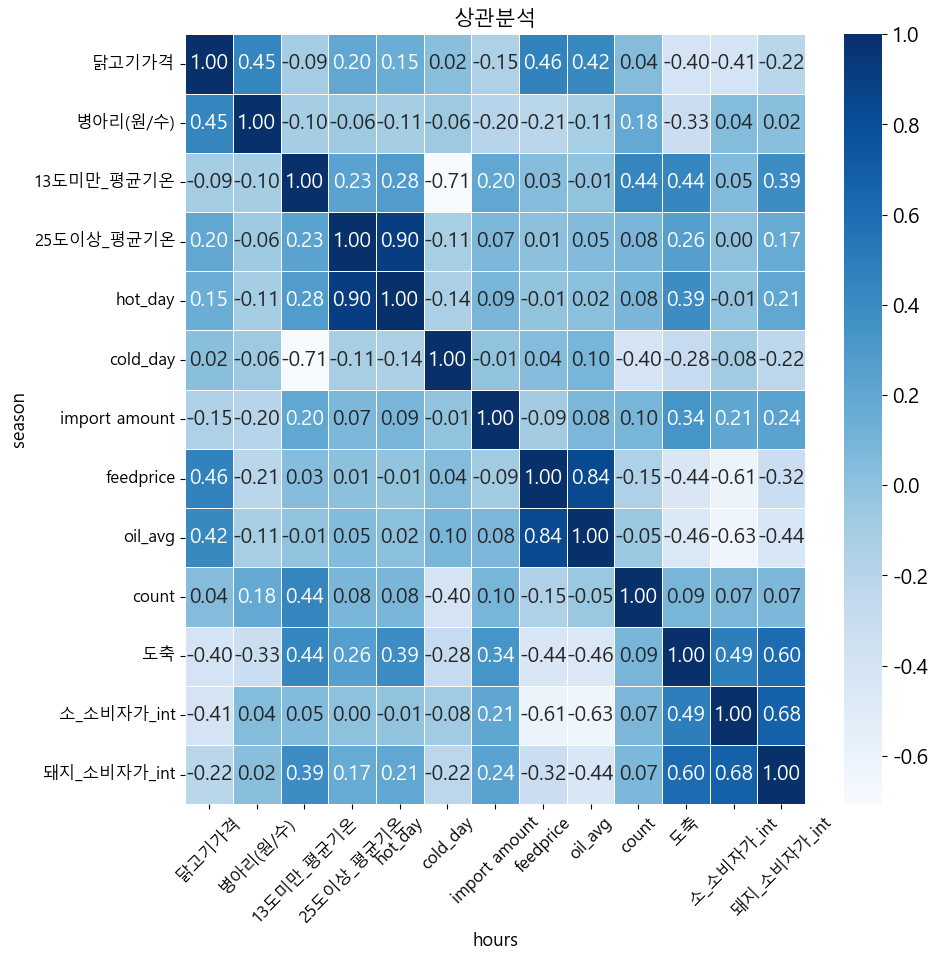

In [615]:
# 히트맵을 그릴 격자 생성
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(corr_m_data, # 위에서 전처리한 데이터프레임
            annot = True, # 숫자 표시 여부
            ax = ax, # 히트맵을 그릴 격자
            linewidths = 0.4, # 선의 굵기
            linecolor = 'white', # 선의 색깔
            fmt = '.2f', # 소수점 포맷팅 형태
            cmap = 'Blues') # colormap 형태

plt.title('상관분석', size = 15)
plt.ylabel('season', size = 13)
plt.xlabel('hours', size = 13) 

plt.xticks(rotation=45, size = 12)
plt.yticks(size=12) 
plt.show()

## 한국 금리 데이터 전처리
- 날짜 월말로 변경 후 통합데이터와 병합
- 널 값 전월 값으로 대체

In [187]:
kor_interest = pd.read_csv('./data/한국_기준금리.csv', encoding='cp949')
kor_interest

,date,한국기준금리
0,2022-10-12,3.00
1,2022-08-25,2.50
2,2022-07-13,2.25
3,2022-05-26,1.75
4,2022-04-14,1.50
5,2022-01-14,1.25
6,2021-11-25,1.00
7,2021-08-26,0.75
8,2020-05-28,0.50
9,2020-03-17,0.75


In [188]:
kor_interest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    22 non-null     object 
 1   한국기준금리  22 non-null     float64
dtypes: float64(1), object(1)
memory usage: 480.0+ bytes


In [189]:
# 데이터 형 변환
kor_interest['date'] = pd.to_datetime(kor_interest['date'])

In [190]:
kor_interest['한국기준금리'] = pd.to_numeric(kor_interest['한국기준금리'])

In [191]:
kor_interest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    22 non-null     datetime64[ns]
 1   한국기준금리  22 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 480.0 bytes


In [192]:
# 각 날짜를 월말로 바꿈
kor_interest['date'] = kor_interest['date'] + pd.offsets.MonthEnd(0) 
kor_interest

,date,한국기준금리
0,2022-10-31,3.00
1,2022-08-31,2.50
2,2022-07-31,2.25
3,2022-05-31,1.75
4,2022-04-30,1.50
5,2022-01-31,1.25
6,2021-11-30,1.00
7,2021-08-31,0.75
8,2020-05-31,0.50
9,2020-03-31,0.75


In [193]:
# 2022년 데이터 제거
drop_2022 = kor_interest[kor_interest['date'] >= '2022-01-01' ].index
drop_2022 = kor_interest.drop(drop_2022)
drop_2022

,date,한국기준금리
6,2021-11-30,1.00
7,2021-08-31,0.75
8,2020-05-31,0.50
9,2020-03-31,0.75
10,2019-10-31,1.25
11,2019-07-31,1.50
12,2018-11-30,1.75
13,2017-11-30,1.50
14,2016-06-30,1.25
15,2015-06-30,1.50


In [194]:
df_m_final

,date,닭고기가격,병아리(원/수),13도미만_평균기온,25도이상_평균기온,hot_day,cold_day,import amount,feedprice,oil_avg,count,도축,소_소비자가_int,돼지_소비자가_int
0,2012-01-31,3202,250,-1.5,0.0,0.0,4.0,8754,533,107.066111,356,58873,59981.578947,18465.263158
1,2012-02-29,3668,420,-1.1,0.0,0.0,3.0,10098,529,112.537302,672,55879,56019.047619,16634.761905
2,2012-03-31,4169,500,5.4,0.0,0.0,0.0,10836,527,117.745606,870,58750,50899.047619,16317.619048
3,2012-04-30,3399,332,12.4,0.0,0.0,0.0,13412,526,113.723667,718,60940,53879.700000,15882.100000
4,2012-05-31,3255,200,0.0,0.0,0.0,0.0,14519,526,104.184710,496,73505,55403.047619,16798.619048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2021-08-31,3505,312,0.0,0.0,3.0,0.0,9360,492,69.247955,670,89892,99247.863636,26078.045455
116,2021-09-30,3074,408,0.0,0.0,0.0,0.0,9009,503,72.975152,479,81026,103039.842105,26346.052632
117,2021-10-31,3913,447,0.0,0.0,0.0,0.0,12005,508,82.193333,591,81228,110791.666667,25977.333333
118,2021-11-30,2985,315,8.3,0.0,0.0,0.0,10025,520,79.858712,652,86819,107207.636364,25217.727273


In [195]:
df_OUTER_JOIN = pd.merge(df_m_final, drop_2022, left_on='date', right_on='date', how='outer')
df_OUTER_JOIN

,date,닭고기가격,병아리(원/수),13도미만_평균기온,25도이상_평균기온,hot_day,cold_day,import amount,feedprice,oil_avg,count,도축,소_소비자가_int,돼지_소비자가_int,한국기준금리
0,2012-01-31,3202,250,-1.5,0.0,0.0,4.0,8754,533,107.066111,356,58873,59981.578947,18465.263158,NaN
1,2012-02-29,3668,420,-1.1,0.0,0.0,3.0,10098,529,112.537302,672,55879,56019.047619,16634.761905,NaN
2,2012-03-31,4169,500,5.4,0.0,0.0,0.0,10836,527,117.745606,870,58750,50899.047619,16317.619048,NaN
3,2012-04-30,3399,332,12.4,0.0,0.0,0.0,13412,526,113.723667,718,60940,53879.700000,15882.100000,NaN
4,2012-05-31,3255,200,0.0,0.0,0.0,0.0,14519,526,104.184710,496,73505,55403.047619,16798.619048,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2021-08-31,3505,312,0.0,0.0,3.0,0.0,9360,492,69.247955,670,89892,99247.863636,26078.045455,0.75
116,2021-09-30,3074,408,0.0,0.0,0.0,0.0,9009,503,72.975152,479,81026,103039.842105,26346.052632,NaN
117,2021-10-31,3913,447,0.0,0.0,0.0,0.0,12005,508,82.193333,591,81228,110791.666667,25977.333333,NaN
118,2021-11-30,2985,315,8.3,0.0,0.0,0.0,10025,520,79.858712,652,86819,107207.636364,25217.727273,1.00


In [196]:
df_OUTER_JOIN.isnull().sum()

date               0
닭고기가격              0
병아리(원/수)           0
13도미만_평균기온         0
25도이상_평균기온         0
hot_day            0
cold_day           0
import amount      0
feedprice          0
oil_avg            0
count              0
도축                 0
소_소비자가_int         0
돼지_소비자가_int        0
한국기준금리           104
dtype: int64

In [197]:
df_OUTER_JOIN['한국기준금리'] = df_OUTER_JOIN['한국기준금리'].fillna(method='pad')
df_OUTER_JOIN

,date,닭고기가격,병아리(원/수),13도미만_평균기온,25도이상_평균기온,hot_day,cold_day,import amount,feedprice,oil_avg,count,도축,소_소비자가_int,돼지_소비자가_int,한국기준금리
0,2012-01-31,3202,250,-1.5,0.0,0.0,4.0,8754,533,107.066111,356,58873,59981.578947,18465.263158,NaN
1,2012-02-29,3668,420,-1.1,0.0,0.0,3.0,10098,529,112.537302,672,55879,56019.047619,16634.761905,NaN
2,2012-03-31,4169,500,5.4,0.0,0.0,0.0,10836,527,117.745606,870,58750,50899.047619,16317.619048,NaN
3,2012-04-30,3399,332,12.4,0.0,0.0,0.0,13412,526,113.723667,718,60940,53879.700000,15882.100000,NaN
4,2012-05-31,3255,200,0.0,0.0,0.0,0.0,14519,526,104.184710,496,73505,55403.047619,16798.619048,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2021-08-31,3505,312,0.0,0.0,3.0,0.0,9360,492,69.247955,670,89892,99247.863636,26078.045455,0.75
116,2021-09-30,3074,408,0.0,0.0,0.0,0.0,9009,503,72.975152,479,81026,103039.842105,26346.052632,0.75
117,2021-10-31,3913,447,0.0,0.0,0.0,0.0,12005,508,82.193333,591,81228,110791.666667,25977.333333,0.75
118,2021-11-30,2985,315,8.3,0.0,0.0,0.0,10025,520,79.858712,652,86819,107207.636364,25217.727273,1.00


In [198]:
df_OUTER_JOIN.isnull().sum()

date             0
닭고기가격            0
병아리(원/수)         0
13도미만_평균기온       0
25도이상_평균기온       0
hot_day          0
cold_day         0
import amount    0
feedprice        0
oil_avg          0
count            0
도축               0
소_소비자가_int       0
돼지_소비자가_int      0
한국기준금리           6
dtype: int64

In [199]:
# 앞의 기준금리로 null 값을 채우고 난 다음, 2012년 상반기 기준 금리 null 값을 2011년 마지막 기준금리 값으로 채움 !!
df_OUTER_JOIN['한국기준금리'] = df_OUTER_JOIN['한국기준금리'].fillna(3.25)
df_OUTER_JOIN

,date,닭고기가격,병아리(원/수),13도미만_평균기온,25도이상_평균기온,hot_day,cold_day,import amount,feedprice,oil_avg,count,도축,소_소비자가_int,돼지_소비자가_int,한국기준금리
0,2012-01-31,3202,250,-1.5,0.0,0.0,4.0,8754,533,107.066111,356,58873,59981.578947,18465.263158,3.25
1,2012-02-29,3668,420,-1.1,0.0,0.0,3.0,10098,529,112.537302,672,55879,56019.047619,16634.761905,3.25
2,2012-03-31,4169,500,5.4,0.0,0.0,0.0,10836,527,117.745606,870,58750,50899.047619,16317.619048,3.25
3,2012-04-30,3399,332,12.4,0.0,0.0,0.0,13412,526,113.723667,718,60940,53879.700000,15882.100000,3.25
4,2012-05-31,3255,200,0.0,0.0,0.0,0.0,14519,526,104.184710,496,73505,55403.047619,16798.619048,3.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2021-08-31,3505,312,0.0,0.0,3.0,0.0,9360,492,69.247955,670,89892,99247.863636,26078.045455,0.75
116,2021-09-30,3074,408,0.0,0.0,0.0,0.0,9009,503,72.975152,479,81026,103039.842105,26346.052632,0.75
117,2021-10-31,3913,447,0.0,0.0,0.0,0.0,12005,508,82.193333,591,81228,110791.666667,25977.333333,0.75
118,2021-11-30,2985,315,8.3,0.0,0.0,0.0,10025,520,79.858712,652,86819,107207.636364,25217.727273,1.00


In [200]:
df_kor = df_OUTER_JOIN[['date', '한국기준금리']]
df_kor

,date,한국기준금리
0,2012-01-31,3.25
1,2012-02-29,3.25
2,2012-03-31,3.25
3,2012-04-30,3.25
4,2012-05-31,3.25
...,...,...
115,2021-08-31,0.75
116,2021-09-30,0.75
117,2021-10-31,0.75
118,2021-11-30,1.00


In [92]:
df_kor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    120 non-null    datetime64[ns]
 1   한국기준금리  120 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.8 KB


In [93]:
# 월별 한국기준금리 데이터 파일 저장
df_kor.to_csv('./pre_data/월별_한국기준금리.csv',encoding='utf-8')

In [94]:
df_OUTER_JOIN.to_csv('./pre_data/월별_통합_한국금리추가.csv', encoding='utf-8')

In [95]:
corr_join_date = df_OUTER_JOIN.corr()
corr_join_date

,닭고기가격,병아리(원/수),13도미만_평균기온,25도이상_평균기온,hot_day,cold_day,import amount,feedprice,oil_avg,count,도축,소_소비자가_int,돼지_소비자가_int,한국기준금리
닭고기가격,1.000000,0.445516,-0.021577,0.158840,0.150293,0.021131,-0.154698,0.461750,0.415093,0.038797,-0.403027,-0.406267,-0.218383,0.132655
병아리(원/수),0.445516,1.000000,0.166219,-0.083512,-0.105209,-0.063211,-0.199129,-0.213263,-0.111327,0.184980,-0.325786,0.041969,0.020754,0.133999
13도미만_평균기온,-0.021577,0.166219,1.000000,-0.188405,-0.198326,-0.308908,-0.063816,-0.031586,-0.047938,0.197585,-0.125585,0.025043,-0.224075,-0.073592
25도이상_평균기온,0.158840,-0.083512,-0.188405,1.000000,0.864788,-0.131816,0.070751,0.026933,0.023309,-0.001177,0.351529,-0.006014,0.202048,0.113216
hot_day,0.150293,-0.105209,-0.198326,0.864788,1.000000,-0.138757,0.089705,-0.013836,0.016038,0.081723,0.387392,-0.011019,0.205122,0.067016
cold_day,0.021131,-0.063211,-0.308908,-0.131816,-0.138757,1.000000,-0.008635,0.037891,0.096895,-0.403974,-0.278001,-0.078623,-0.222823,0.134416
import amount,-0.154698,-0.199129,-0.063816,0.070751,0.089705,-0.008635,1.000000,-0.087719,0.078222,0.098413,0.338863,0.212651,0.239069,-0.084048
feedprice,0.461750,-0.213263,-0.031586,0.026933,-0.013836,0.037891,-0.087719,1.000000,0.836585,-0.151148,-0.440870,-0.605468,-0.324895,0.040115
oil_avg,0.415093,-0.111327,-0.047938,0.023309,0.016038,0.096895,0.078222,0.836585,1.000000,-0.052721,-0.459850,-0.628174,-0.438258,0.123850
count,0.038797,0.184980,0.197585,-0.001177,0.081723,-0.403974,0.098413,-0.151148,-0.052721,1.000000,0.087217,0.072973,0.071740,-0.169942


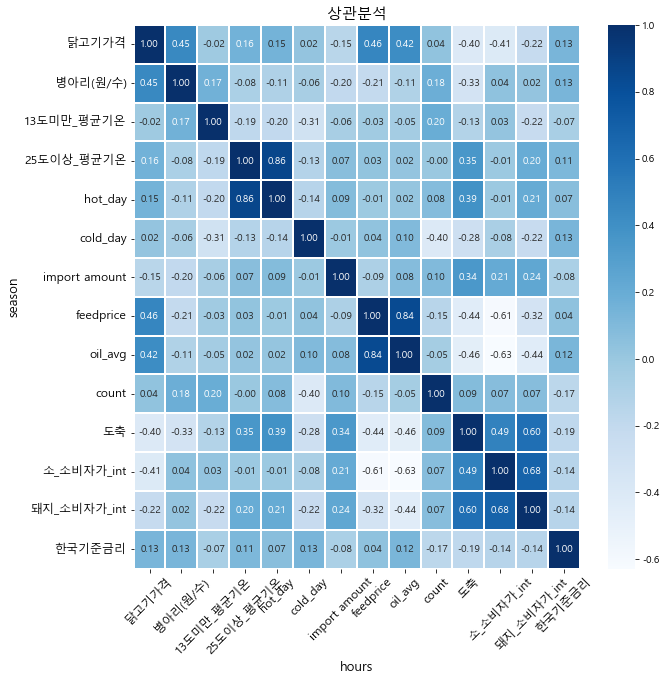

In [99]:
# 히트맵을 그릴 격자 생성
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(corr_join_date, # 위에서 전처리한 데이터프레임
            annot = True, # 숫자 표시 여부
            ax = ax, # 히트맵을 그릴 격자
            linewidths = 0.4, # 선의 굵기
            linecolor = 'white', # 선의 색깔
            fmt = '.2f', # 소수점 포맷팅 형태
            cmap = 'Blues') # colormap 형태

plt.title('상관분석', size = 15)
plt.ylabel('season', size = 13)
plt.xlabel('hours', size = 13) 

plt.xticks(rotation=45, size = 12)
plt.yticks(size=12) 
plt.show()

In [171]:
ame_interest = pd.read_csv('./data/미금리전처리.csv', encoding='utf-8')

In [173]:
ame_interest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  120 non-null    int64  
 1   date        120 non-null    object 
 2   미국기준금리      120 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.9+ KB


In [174]:
ame_interest['date'] = pd.to_datetime(ame_interest['date'])

In [175]:
all_join = pd.merge(df_OUTER_JOIN, ame_interest, left_on='date', right_on='date', how='outer')
all_join

,date,닭고기가격,병아리(원/수),13도미만_평균기온,25도이상_평균기온,hot_day,cold_day,import amount,feedprice,oil_avg,count,도축,소_소비자가_int,돼지_소비자가_int,한국기준금리,Unnamed: 0,미국기준금리
0,2012-01-31,3202,250,-1.5,0.0,0.0,4.0,8754,533,107.066111,356,58873,59981.578947,18465.263158,3.25,0,0.25
1,2012-02-29,3668,420,-1.1,0.0,0.0,3.0,10098,529,112.537302,672,55879,56019.047619,16634.761905,3.25,1,0.25
2,2012-03-31,4169,500,5.4,0.0,0.0,0.0,10836,527,117.745606,870,58750,50899.047619,16317.619048,3.25,2,0.25
3,2012-04-30,3399,332,12.4,0.0,0.0,0.0,13412,526,113.723667,718,60940,53879.700000,15882.100000,3.25,3,0.25
4,2012-05-31,3255,200,0.0,0.0,0.0,0.0,14519,526,104.184710,496,73505,55403.047619,16798.619048,3.25,4,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2021-08-31,3505,312,0.0,0.0,3.0,0.0,9360,492,69.247955,670,89892,99247.863636,26078.045455,0.75,115,0.25
116,2021-09-30,3074,408,0.0,0.0,0.0,0.0,9009,503,72.975152,479,81026,103039.842105,26346.052632,3.25,116,0.25
117,2021-10-31,3913,447,0.0,0.0,0.0,0.0,12005,508,82.193333,591,81228,110791.666667,25977.333333,3.25,117,0.25
118,2021-11-30,2985,315,8.3,0.0,0.0,0.0,10025,520,79.858712,652,86819,107207.636364,25217.727273,1.00,118,0.25


In [176]:
drop_month = all_join.drop(columns=['Unnamed: 0'],axis=1)
drop_month

,date,닭고기가격,병아리(원/수),13도미만_평균기온,25도이상_평균기온,hot_day,cold_day,import amount,feedprice,oil_avg,count,도축,소_소비자가_int,돼지_소비자가_int,한국기준금리,미국기준금리
0,2012-01-31,3202,250,-1.5,0.0,0.0,4.0,8754,533,107.066111,356,58873,59981.578947,18465.263158,3.25,0.25
1,2012-02-29,3668,420,-1.1,0.0,0.0,3.0,10098,529,112.537302,672,55879,56019.047619,16634.761905,3.25,0.25
2,2012-03-31,4169,500,5.4,0.0,0.0,0.0,10836,527,117.745606,870,58750,50899.047619,16317.619048,3.25,0.25
3,2012-04-30,3399,332,12.4,0.0,0.0,0.0,13412,526,113.723667,718,60940,53879.700000,15882.100000,3.25,0.25
4,2012-05-31,3255,200,0.0,0.0,0.0,0.0,14519,526,104.184710,496,73505,55403.047619,16798.619048,3.25,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2021-08-31,3505,312,0.0,0.0,3.0,0.0,9360,492,69.247955,670,89892,99247.863636,26078.045455,0.75,0.25
116,2021-09-30,3074,408,0.0,0.0,0.0,0.0,9009,503,72.975152,479,81026,103039.842105,26346.052632,3.25,0.25
117,2021-10-31,3913,447,0.0,0.0,0.0,0.0,12005,508,82.193333,591,81228,110791.666667,25977.333333,3.25,0.25
118,2021-11-30,2985,315,8.3,0.0,0.0,0.0,10025,520,79.858712,652,86819,107207.636364,25217.727273,1.00,0.25


In [178]:
corr_month = drop_month.corr()
corr_month

,닭고기가격,병아리(원/수),13도미만_평균기온,25도이상_평균기온,hot_day,cold_day,import amount,feedprice,oil_avg,count,도축,소_소비자가_int,돼지_소비자가_int,한국기준금리,미국기준금리
닭고기가격,1.000000,0.445516,-0.021577,0.158840,0.150293,0.021131,-0.154698,0.461750,0.415093,0.038797,-0.403027,-0.406267,-0.218383,0.132655,-0.248264
병아리(원/수),0.445516,1.000000,0.166219,-0.083512,-0.105209,-0.063211,-0.199129,-0.213263,-0.111327,0.184980,-0.325786,0.041969,0.020754,0.133999,0.164919
13도미만_평균기온,-0.021577,0.166219,1.000000,-0.188405,-0.198326,-0.308908,-0.063816,-0.031586,-0.047938,0.197585,-0.125585,0.025043,-0.224075,-0.073592,0.057474
25도이상_평균기온,0.158840,-0.083512,-0.188405,1.000000,0.864788,-0.131816,0.070751,0.026933,0.023309,-0.001177,0.351529,-0.006014,0.202048,0.113216,0.049021
hot_day,0.150293,-0.105209,-0.198326,0.864788,1.000000,-0.138757,0.089705,-0.013836,0.016038,0.081723,0.387392,-0.011019,0.205122,0.067016,0.092083
cold_day,0.021131,-0.063211,-0.308908,-0.131816,-0.138757,1.000000,-0.008635,0.037891,0.096895,-0.403974,-0.278001,-0.078623,-0.222823,0.134416,-0.025403
import amount,-0.154698,-0.199129,-0.063816,0.070751,0.089705,-0.008635,1.000000,-0.087719,0.078222,0.098413,0.338863,0.212651,0.239069,-0.084048,0.164771
feedprice,0.461750,-0.213263,-0.031586,0.026933,-0.013836,0.037891,-0.087719,1.000000,0.836585,-0.151148,-0.440870,-0.605468,-0.324895,0.040115,-0.544540
oil_avg,0.415093,-0.111327,-0.047938,0.023309,0.016038,0.096895,0.078222,0.836585,1.000000,-0.052721,-0.459850,-0.628174,-0.438258,0.123850,-0.224742
count,0.038797,0.184980,0.197585,-0.001177,0.081723,-0.403974,0.098413,-0.151148,-0.052721,1.000000,0.087217,0.072973,0.071740,-0.169942,0.175629


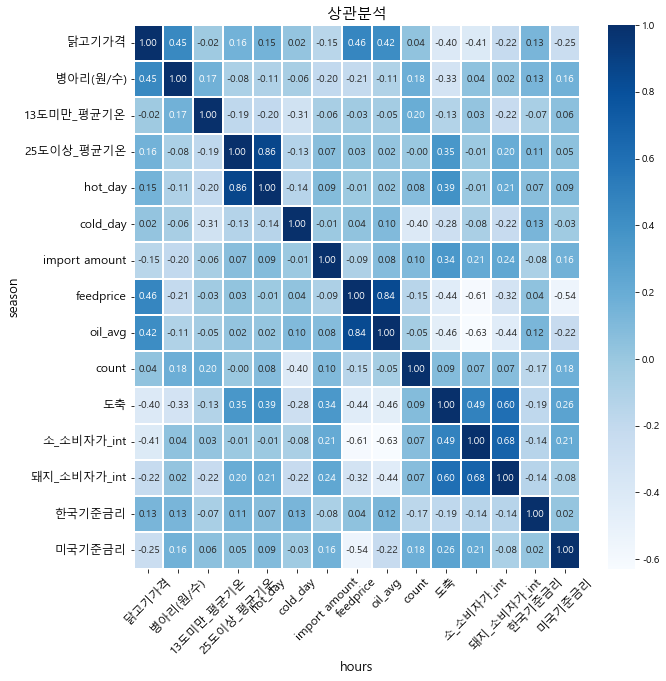

In [179]:
# 히트맵을 그릴 격자 생성
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(corr_month, # 위에서 전처리한 데이터프레임
            annot = True, # 숫자 표시 여부
            ax = ax, # 히트맵을 그릴 격자
            linewidths = 0.4, # 선의 굵기
            linecolor = 'white', # 선의 색깔
            fmt = '.2f', # 소수점 포맷팅 형태
            cmap = 'Blues') # colormap 형태

plt.title('상관분석', size = 15)
plt.ylabel('season', size = 13)
plt.xlabel('hours', size = 13) 

plt.xticks(rotation=45, size = 12)
plt.yticks(size=12) 
plt.show()

In [181]:
drop_month.columns

Index(['date', '닭고기가격', '병아리(원/수)', '13도미만_평균기온', '25도이상_평균기온', 'hot_day',
       'cold_day', 'import amount', 'feedprice', 'oil_avg', 'count', '도축',
       '소_소비자가_int', '돼지_소비자가_int', '한국기준금리', '미국기준금리'],
      dtype='object')

In [183]:
drop_month = all_join.drop(columns=['date', '13도미만_평균기온', '25도이상_평균기온', 'cold_day', 'count', 'Unnamed: 0'],axis=1)
drop_month.head(20)

,닭고기가격,병아리(원/수),hot_day,import amount,feedprice,oil_avg,도축,소_소비자가_int,돼지_소비자가_int,한국기준금리,미국기준금리
0,3202,250,0.0,8754,533,107.066111,58873,59981.578947,18465.263158,3.25,0.25
1,3668,420,0.0,10098,529,112.537302,55879,56019.047619,16634.761905,3.25,0.25
2,4169,500,0.0,10836,527,117.745606,58750,50899.047619,16317.619048,3.25,0.25
3,3399,332,0.0,13412,526,113.723667,60940,53879.700000,15882.100000,3.25,0.25
4,3255,200,0.0,14519,526,104.184710,73505,55403.047619,16798.619048,3.25,0.25
...,...,...,...,...,...,...,...,...,...,...,...
115,3505,312,3.0,9360,492,69.247955,89892,99247.863636,26078.045455,0.75,0.25
116,3074,408,0.0,9009,503,72.975152,81026,103039.842105,26346.052632,3.25,0.25
117,3913,447,0.0,12005,508,82.193333,81228,110791.666667,25977.333333,3.25,0.25
118,2985,315,0.0,10025,520,79.858712,86819,107207.636364,25217.727273,1.00,0.25


In [184]:
corr_month = drop_month.corr()
corr_month

,닭고기가격,병아리(원/수),hot_day,import amount,feedprice,oil_avg,도축,소_소비자가_int,돼지_소비자가_int,한국기준금리,미국기준금리
닭고기가격,1.000000,0.445516,0.150293,-0.154698,0.461750,0.415093,-0.403027,-0.406267,-0.218383,0.132655,-0.248264
병아리(원/수),0.445516,1.000000,-0.105209,-0.199129,-0.213263,-0.111327,-0.325786,0.041969,0.020754,0.133999,0.164919
hot_day,0.150293,-0.105209,1.000000,0.089705,-0.013836,0.016038,0.387392,-0.011019,0.205122,0.067016,0.092083
import amount,-0.154698,-0.199129,0.089705,1.000000,-0.087719,0.078222,0.338863,0.212651,0.239069,-0.084048,0.164771
feedprice,0.461750,-0.213263,-0.013836,-0.087719,1.000000,0.836585,-0.440870,-0.605468,-0.324895,0.040115,-0.544540
oil_avg,0.415093,-0.111327,0.016038,0.078222,0.836585,1.000000,-0.459850,-0.628174,-0.438258,0.123850,-0.224742
도축,-0.403027,-0.325786,0.387392,0.338863,-0.440870,-0.459850,1.000000,0.487987,0.600766,-0.188596,0.264563
소_소비자가_int,-0.406267,0.041969,-0.011019,0.212651,-0.605468,-0.628174,0.487987,1.000000,0.677695,-0.140187,0.206730
돼지_소비자가_int,-0.218383,0.020754,0.205122,0.239069,-0.324895,-0.438258,0.600766,0.677695,1.000000,-0.144695,-0.084047
한국기준금리,0.132655,0.133999,0.067016,-0.084048,0.040115,0.123850,-0.188596,-0.140187,-0.144695,1.000000,0.020485


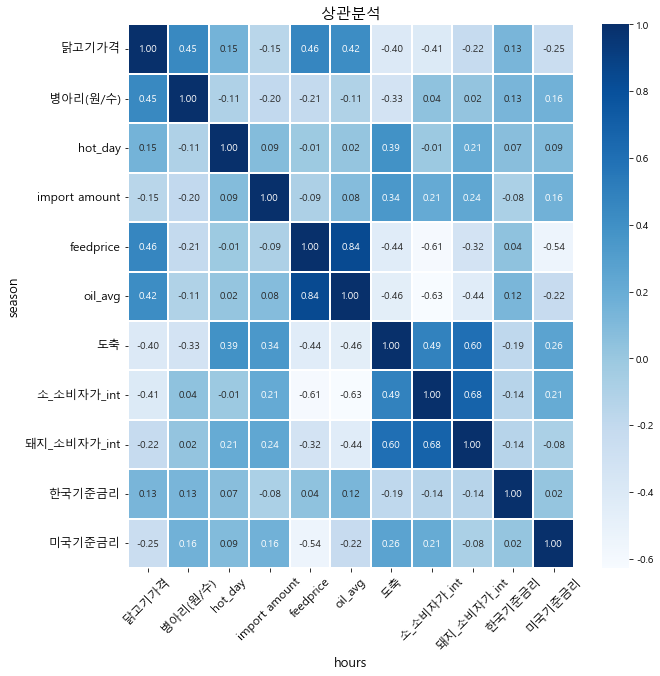

In [185]:
# 히트맵을 그릴 격자 생성
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(corr_month, # 위에서 전처리한 데이터프레임
            annot = True, # 숫자 표시 여부
            ax = ax, # 히트맵을 그릴 격자
            linewidths = 0.4, # 선의 굵기
            linecolor = 'white', # 선의 색깔
            fmt = '.2f', # 소수점 포맷팅 형태
            cmap = 'Blues') # colormap 형태

plt.title('상관분석', size = 15)
plt.ylabel('season', size = 13)
plt.xlabel('hours', size = 13) 

plt.xticks(rotation=45, size = 12)
plt.yticks(size=12) 
plt.show()

In [156]:
daily_total = pd.read_csv('./pre_data/일별_통합_모델링용.csv')

In [157]:
daily_total

,Unnamed: 0,date,price,병아리(원/수),oil_avg,소_소비자가_int,돼지_소비자가_int,미국기준금리,한국기준금리
0,0,2021-12-31,4047,400.0,76.703333,111396.0,25177.0,0.25,1.00
1,1,2021-12-30,4047,400.0,77.850000,111396.0,25411.0,0.25,1.00
2,2,2021-12-29,3895,400.0,77.566667,112019.0,26891.0,0.25,1.00
3,3,2021-12-28,3895,400.0,77.130000,110865.0,26936.0,0.25,1.00
4,4,2021-12-27,3743,400.0,76.530000,109225.0,26993.0,0.25,1.00
...,...,...,...,...,...,...,...,...,...
2991,2991,2012-01-06,3166,200.0,108.180000,58380.0,19570.0,0.75,3.25
2992,2992,2012-01-05,3118,200.0,108.260000,58870.0,19830.0,0.75,3.25
2993,2993,2012-01-04,3118,300.0,108.470000,61700.0,20300.0,0.75,3.25
2994,2994,2012-01-03,3118,300.0,107.000000,61030.0,20330.0,0.75,3.25


In [166]:
drop_daily = daily_total.drop(columns=['Unnamed: 0','date'],axis=1)
drop_daily

,price,병아리(원/수),oil_avg,소_소비자가_int,돼지_소비자가_int,미국기준금리,한국기준금리
0,4047,400.0,76.703333,111396.0,25177.0,0.25,1.00
1,4047,400.0,77.850000,111396.0,25411.0,0.25,1.00
2,3895,400.0,77.566667,112019.0,26891.0,0.25,1.00
3,3895,400.0,77.130000,110865.0,26936.0,0.25,1.00
4,3743,400.0,76.530000,109225.0,26993.0,0.25,1.00
...,...,...,...,...,...,...,...
2991,3166,200.0,108.180000,58380.0,19570.0,0.75,3.25
2992,3118,200.0,108.260000,58870.0,19830.0,0.75,3.25
2993,3118,300.0,108.470000,61700.0,20300.0,0.75,3.25
2994,3118,300.0,107.000000,61030.0,20330.0,0.75,3.25


In [167]:
corr_daily = drop_daily.corr()
corr_daily

,price,병아리(원/수),oil_avg,소_소비자가_int,돼지_소비자가_int,미국기준금리,한국기준금리
price,1.000000,0.385245,0.363031,-0.352491,-0.179127,-0.221882,0.341789
병아리(원/수),0.385245,1.000000,-0.100846,0.034715,0.010524,0.137061,-0.116561
oil_avg,0.363031,-0.100846,1.000000,-0.605983,-0.397668,-0.220543,0.786549
소_소비자가_int,-0.352491,0.034715,-0.605983,1.000000,0.673655,0.198799,-0.892008
돼지_소비자가_int,-0.179127,0.010524,-0.397668,0.673655,1.000000,-0.084323,-0.648609
미국기준금리,-0.221882,0.137061,-0.220543,0.198799,-0.084323,1.000000,-0.147994
한국기준금리,0.341789,-0.116561,0.786549,-0.892008,-0.648609,-0.147994,1.000000


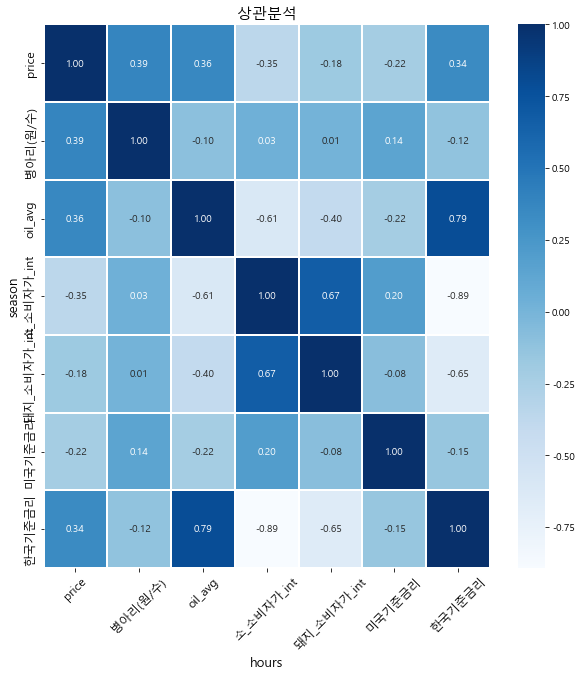

In [169]:
# 히트맵을 그릴 격자 생성
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(corr_daily, # 위에서 전처리한 데이터프레임
            annot = True, # 숫자 표시 여부
            ax = ax, # 히트맵을 그릴 격자
            linewidths = 0.4, # 선의 굵기
            linecolor = 'white', # 선의 색깔
            fmt = '.2f', # 소수점 포맷팅 형태
            cmap = 'Blues') # colormap 형태

plt.title('상관분석', size = 15)
plt.ylabel('season', size = 13)
plt.xlabel('hours', size = 13) 

plt.xticks(rotation=45, size = 12)
plt.yticks(size=12) 
plt.show()